In [ ]:
https://maksimekin.github.io/COVID19-Literature-Clustering/plots/t-sne_covid-19_interactive.html

In [2]:
import pandas as pd
import numpy as np
import copy

data=pd.read_csv("./Data/winequalityN.csv")

# data['Attrition_Flag'] = data['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder



In [ ]:
"OLD cs-7641-machine-learning-master/assgn3-unsupervised_learning/code/

In [3]:
#  Scaling features
scaler = StandardScaler()
scaler.fit(X_train_res)

scaled_x_train = scaler.transform(X_train_res)
scaled_x_test = scaler.transform(x_test)


scaled_x_valid=scaler.transform(x_valid)
# scaled_y_cv =scaler.transform(y_cv)

scaled_x_train.shape
input_shape=[scaled_x_train.shape[1]]

scaled_x_train.shape

(7675, 32)

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_x_train)
print(len(kmeans.labels_))

7675


In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score

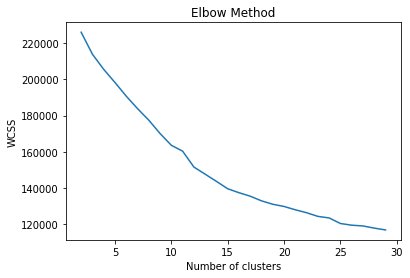

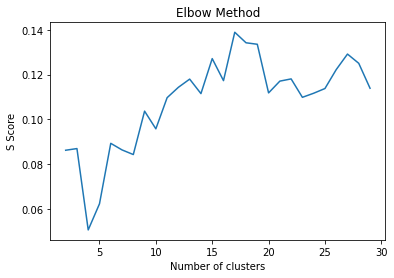

In [6]:
wcss = []
sscore=[]
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_x_train)
    wcss.append(kmeans.inertia_)
    sscore.append(silhouette_score(scaled_x_train, kmeans.labels_, metric='euclidean'))
#
# Print the score
#
# print('Silhouetter Score: %.3f' % score)


plt.plot(range(2, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 30), sscore)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('S Score')
plt.show()

Feature: 0, Score: 0.07153
Feature: 1, Score: 0.00654
Feature: 2, Score: 0.01189
Feature: 3, Score: 0.12710
Feature: 4, Score: 0.05193
Feature: 5, Score: 0.19343
Feature: 6, Score: 0.41137
Feature: 7, Score: 0.06597
Feature: 8, Score: 0.01472
Feature: 9, Score: 0.00078
Feature: 10, Score: 0.01075
Feature: 11, Score: 0.00225
Feature: 12, Score: 0.00121
Feature: 13, Score: 0.00240
Feature: 14, Score: 0.00196
Feature: 15, Score: 0.00104
Feature: 16, Score: 0.00107
Feature: 17, Score: 0.00212
Feature: 18, Score: 0.00063
Feature: 19, Score: 0.00653
Feature: 20, Score: 0.00049
Feature: 21, Score: 0.00066
Feature: 22, Score: 0.00140
Feature: 23, Score: 0.00185
Feature: 24, Score: 0.00162
Feature: 25, Score: 0.00257
Feature: 26, Score: 0.00209
Feature: 27, Score: 0.00211
Feature: 28, Score: 0.00053
Feature: 29, Score: 0.00054
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00092


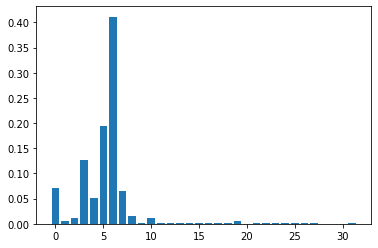

In [7]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(scaled_x_train,y_train_res)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

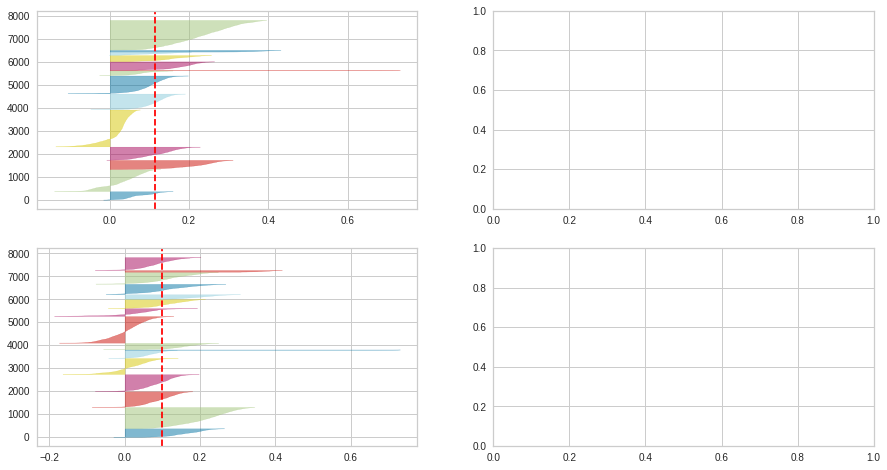

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [14,16]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-12, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_x_train)

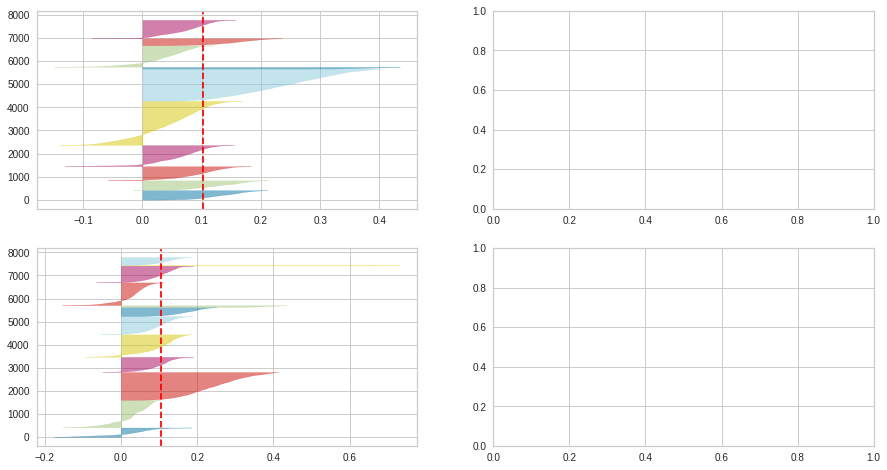

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [10,12]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-8, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_x_train)

In [10]:
kmeanModel= KMeans(n_clusters=16, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel.fit(scaled_x_train)

# scaled_x_train[:,5].shape
kmeanModel.predict(scaled_x_train)
y_train_res.shape

df=pd.DataFrame(columns=X_train_res.columns)
df.shape

df=pd.DataFrame(scaled_x_train)
df.columns=X_train_res.columns



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel.predict(scaled_x_train)
df['target']=y_train_res
print(df.shape)

(7675, 34)


/home/dheekshitha-vibha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


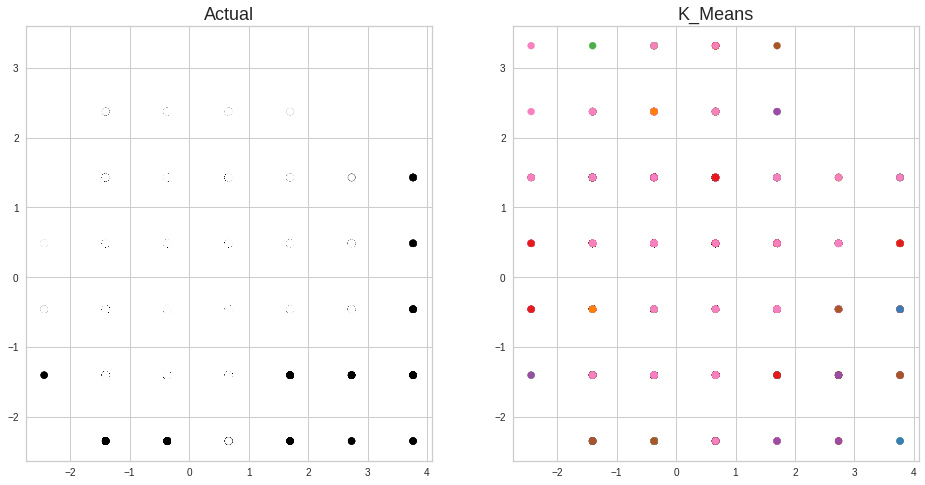

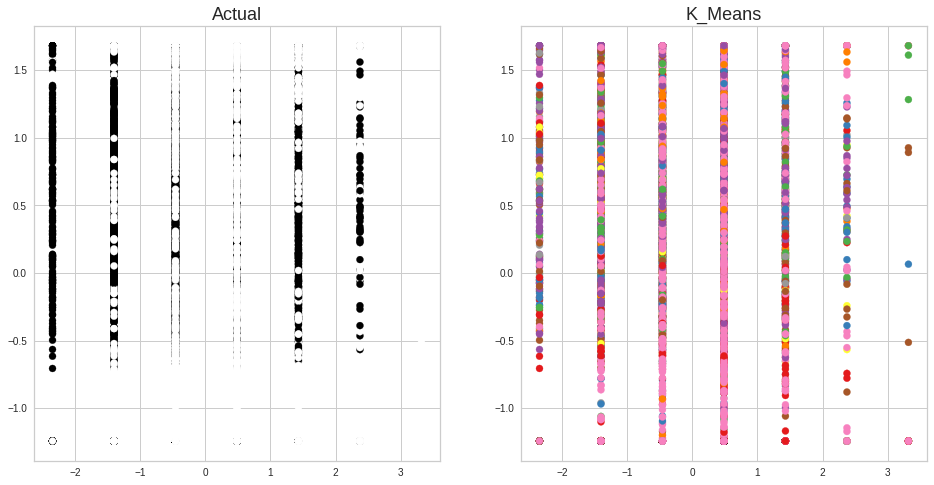

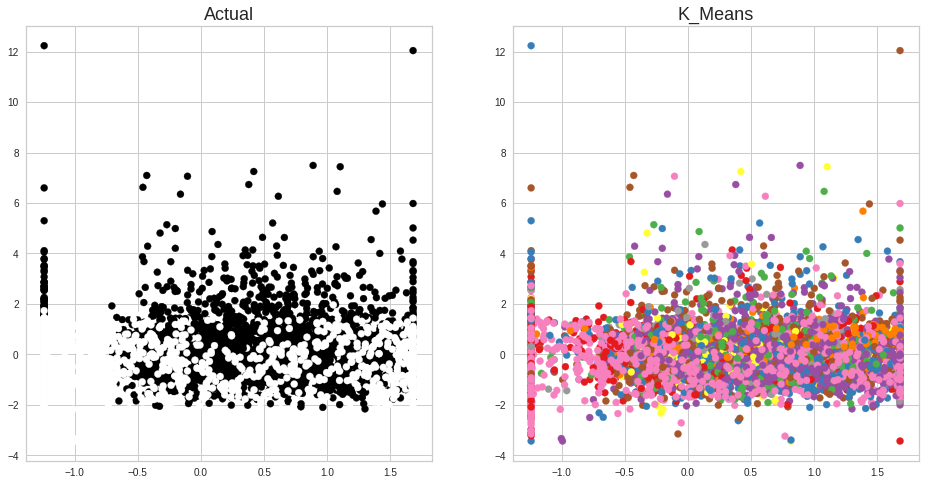

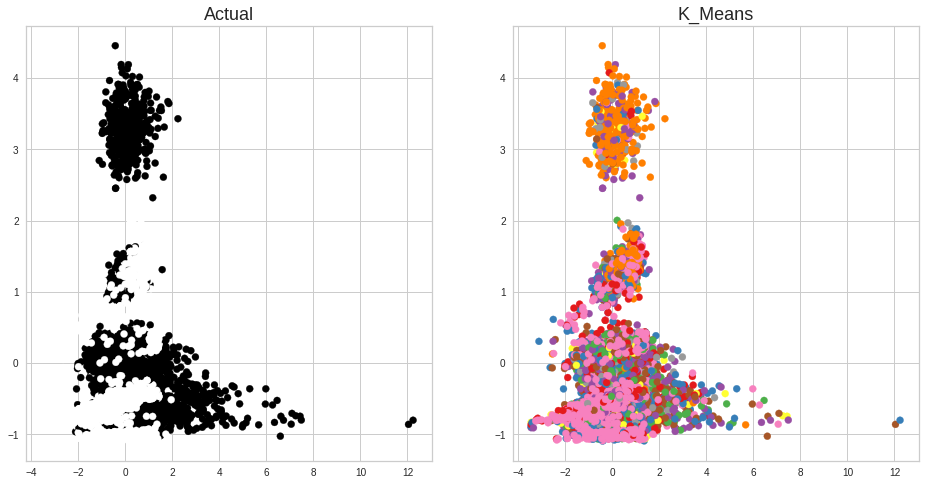

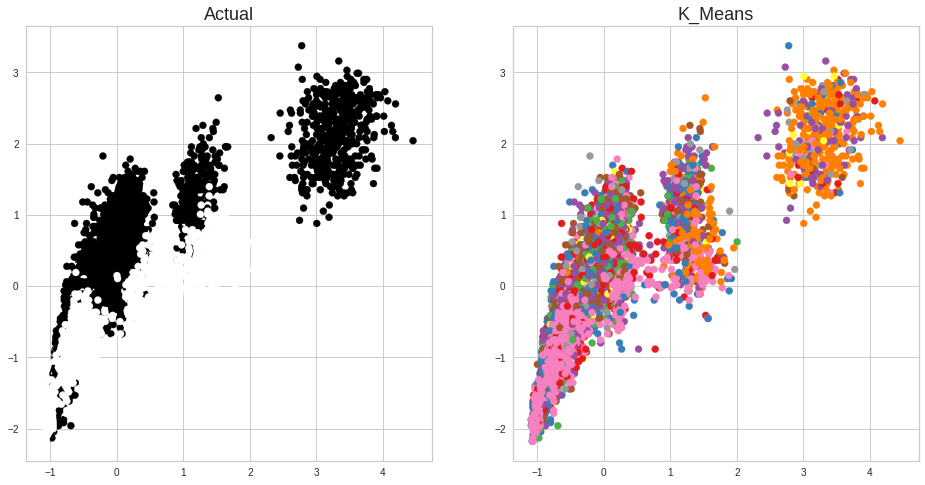

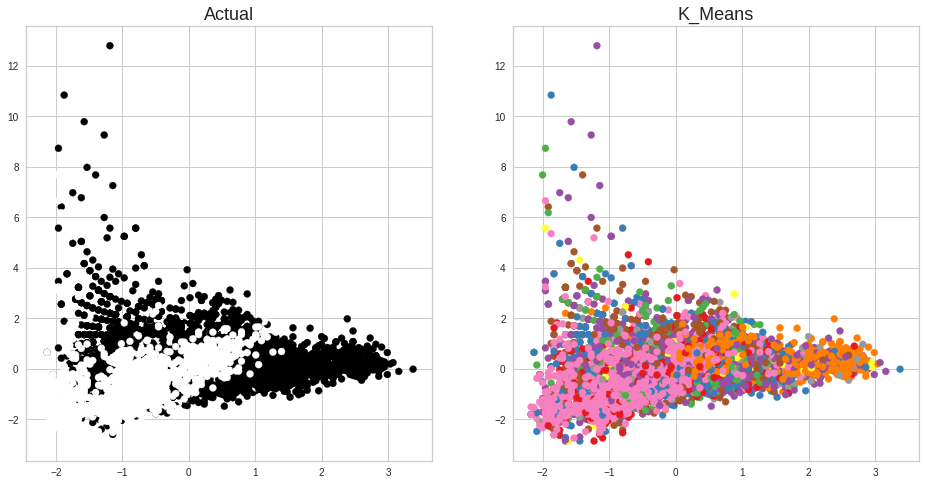

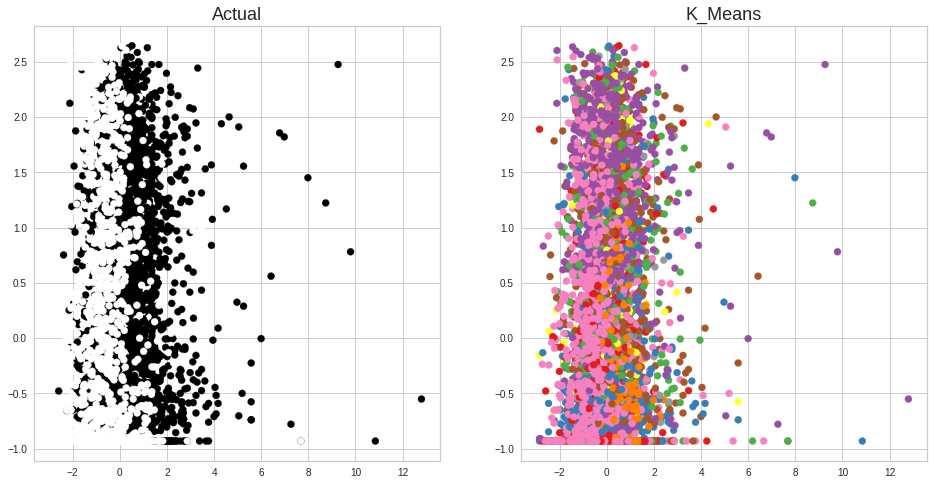

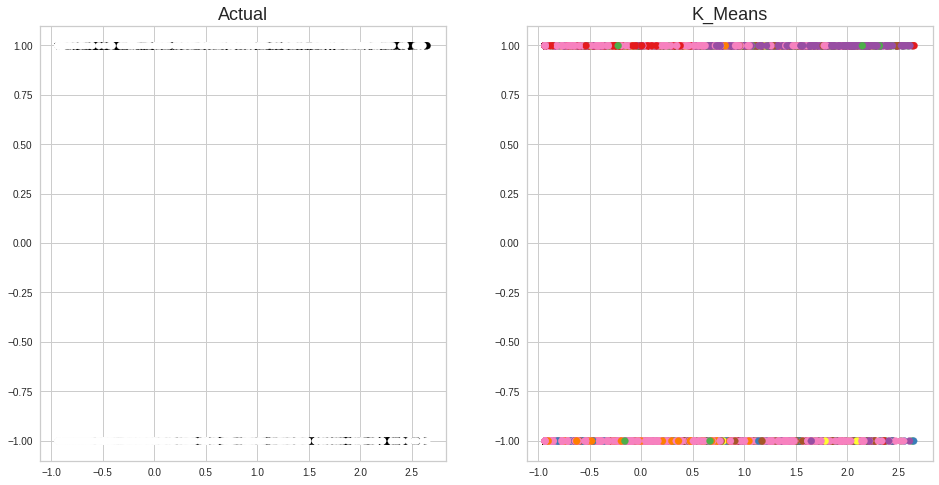

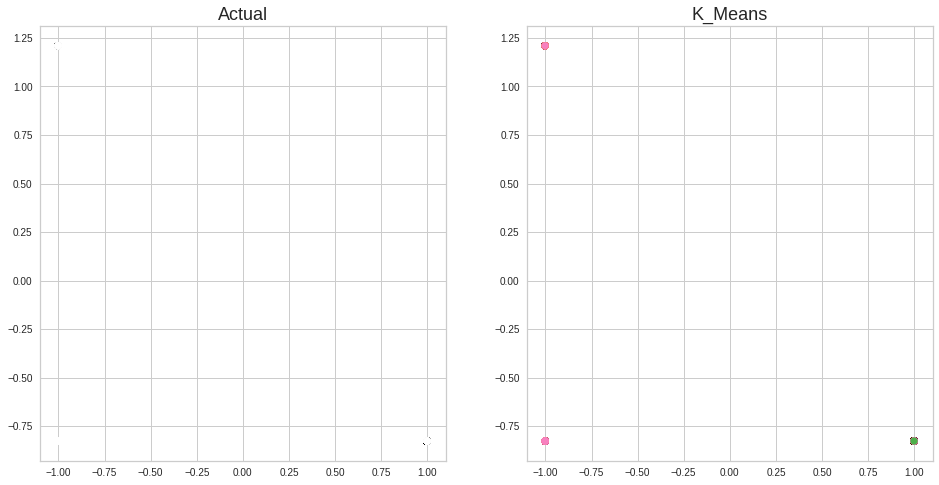

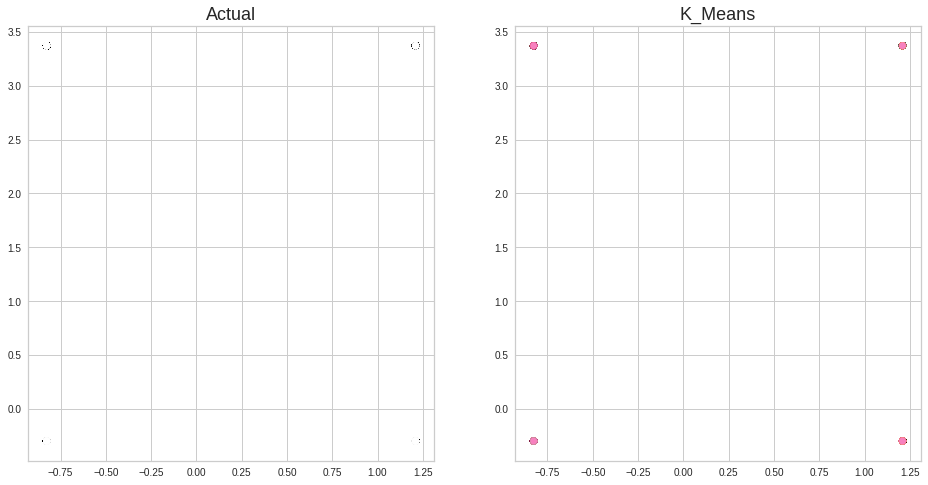

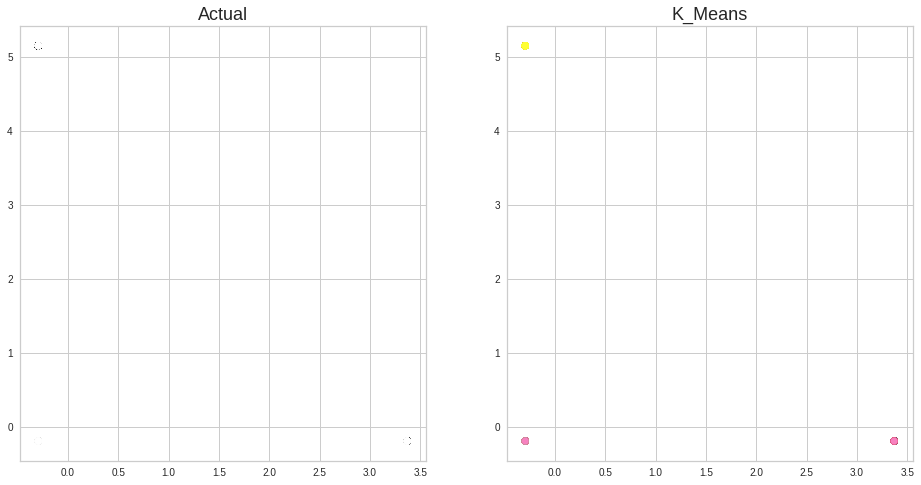

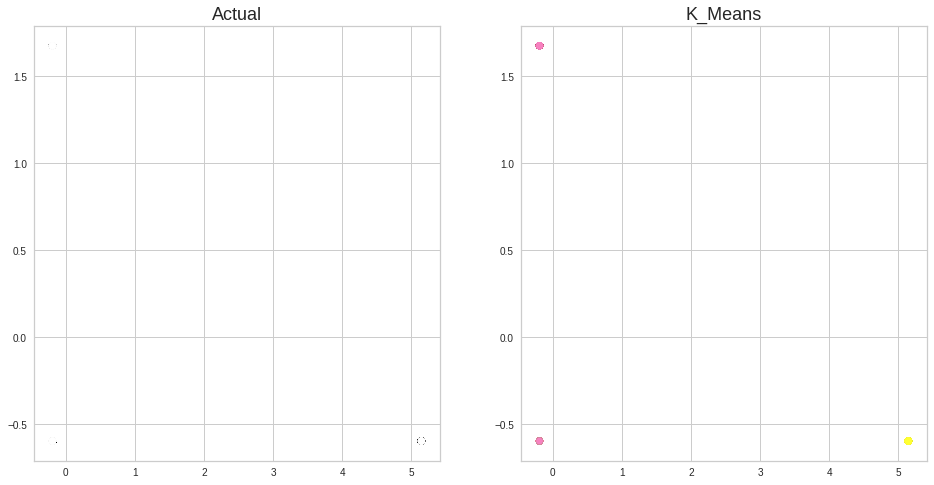

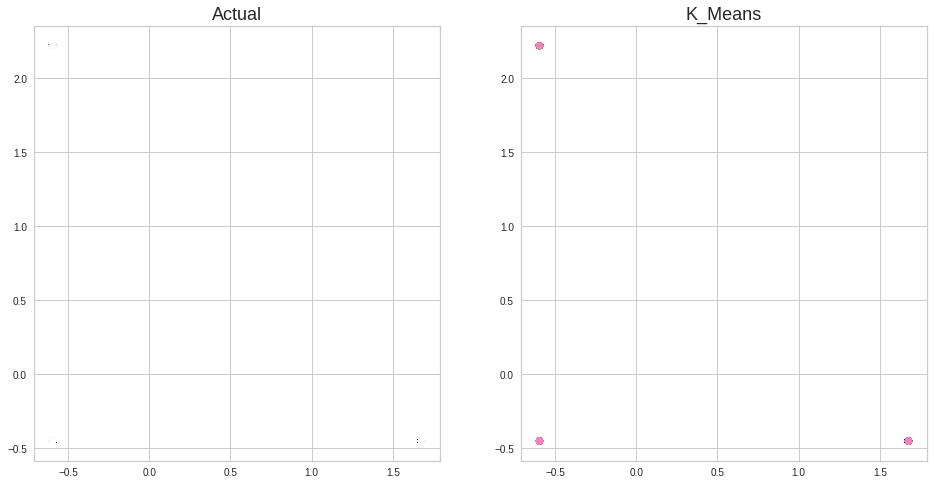

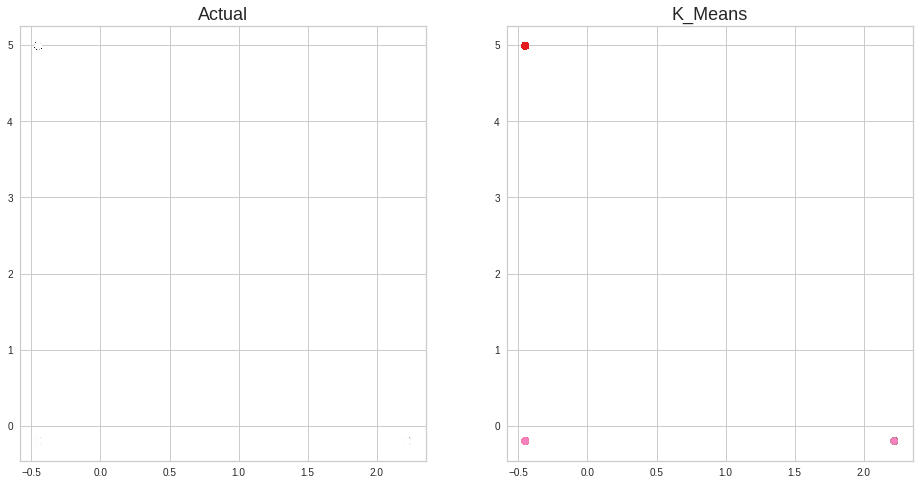

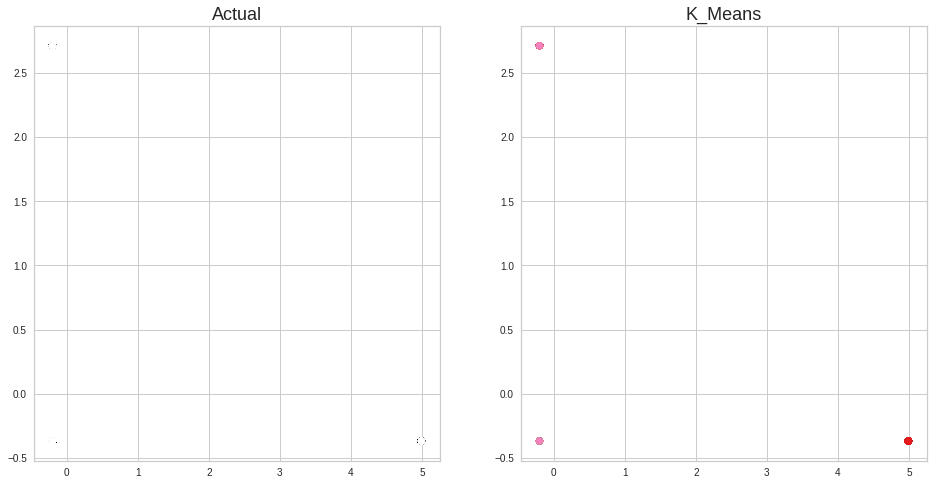

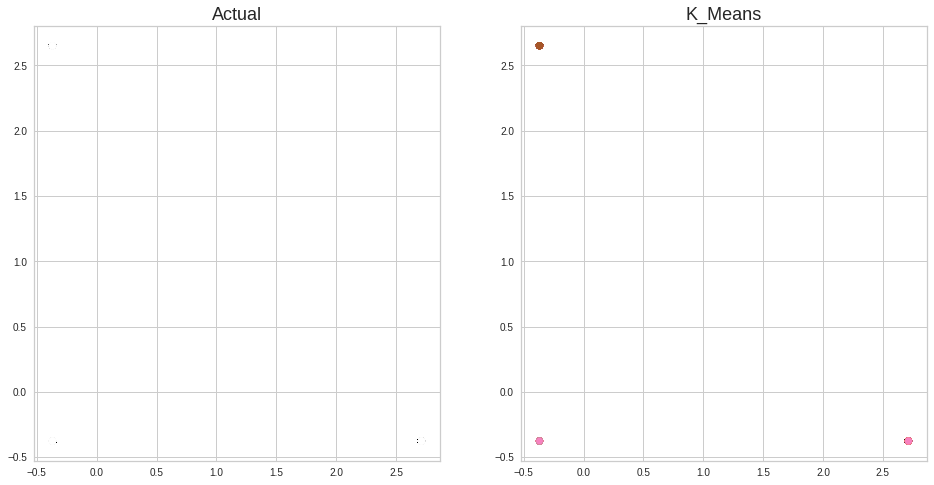

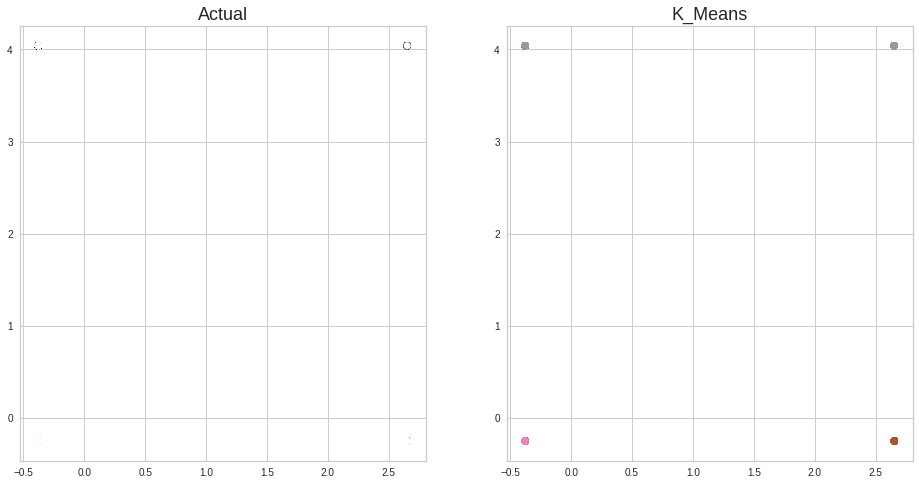

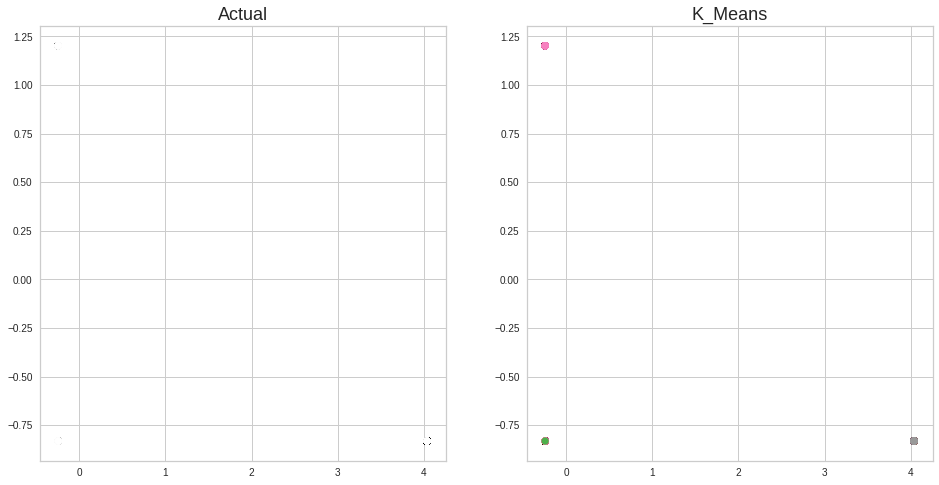

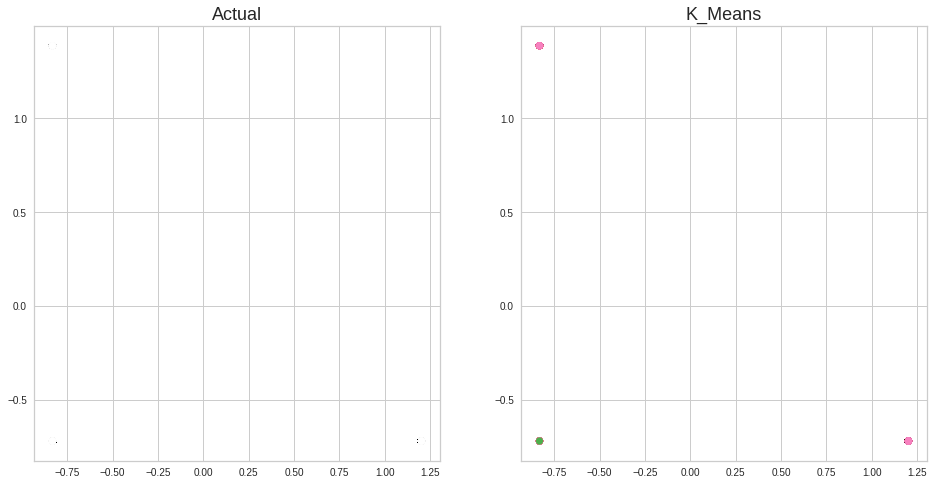

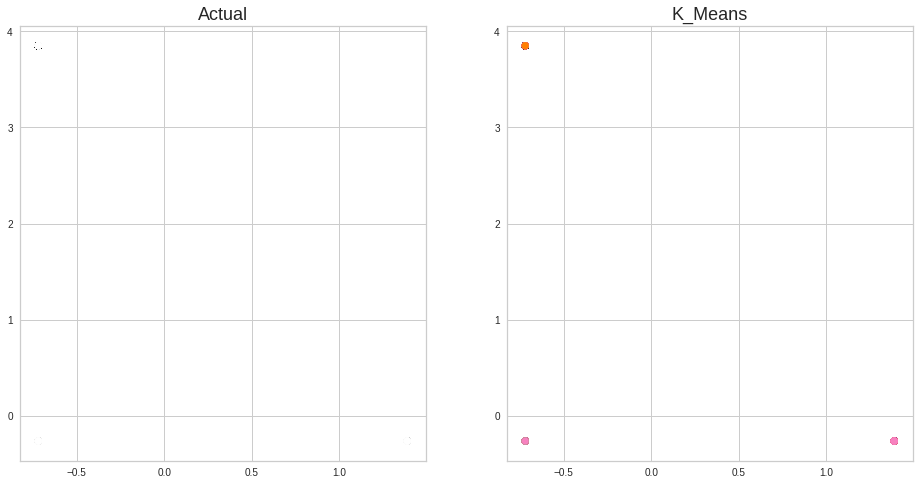

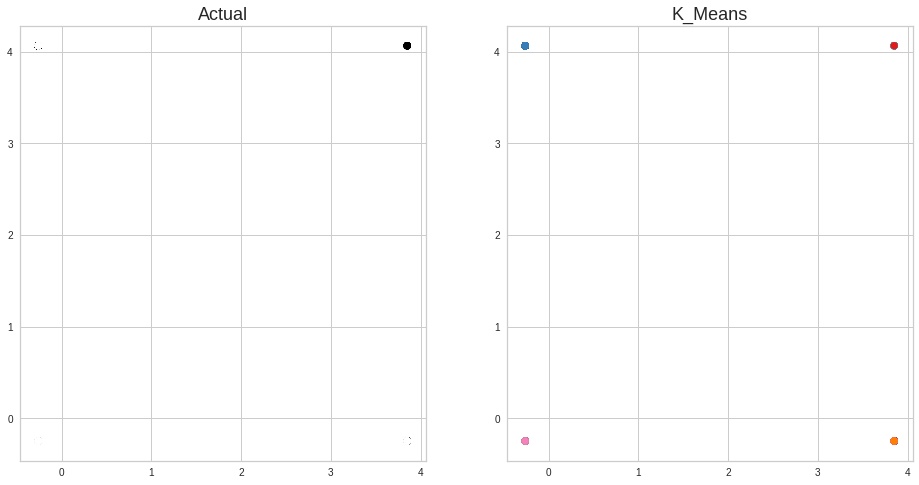

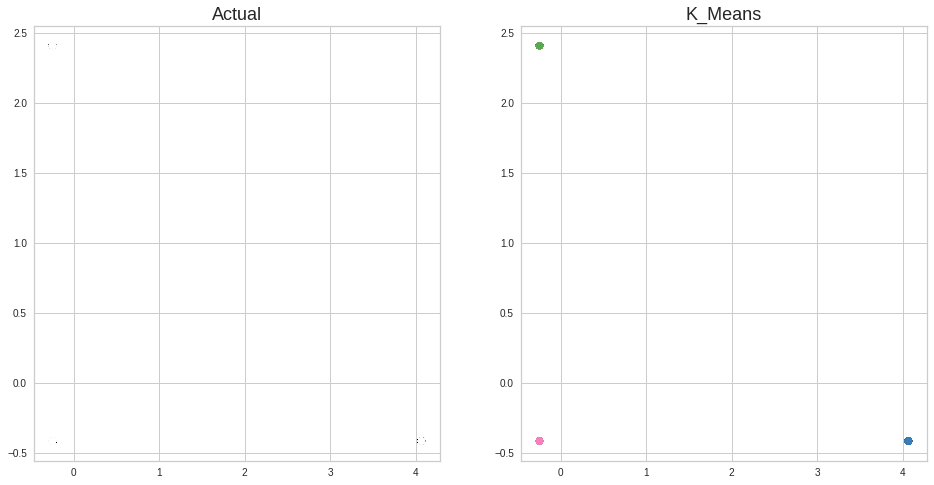

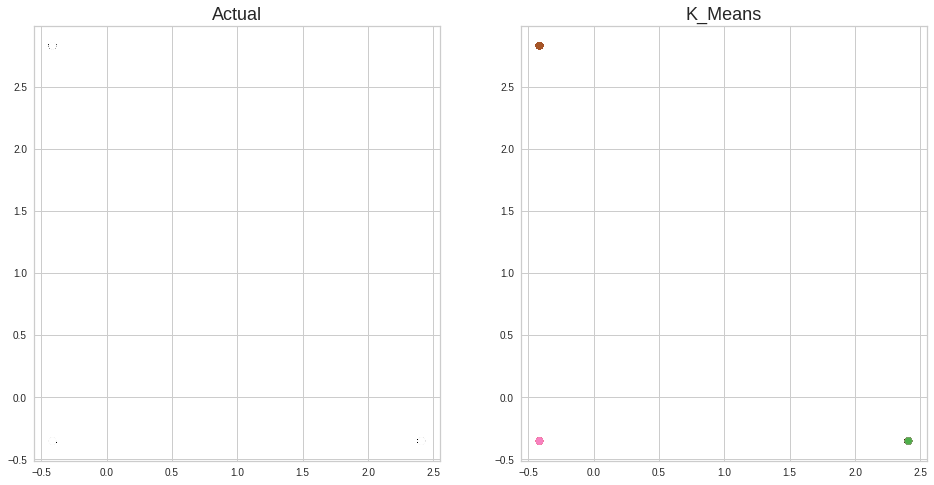

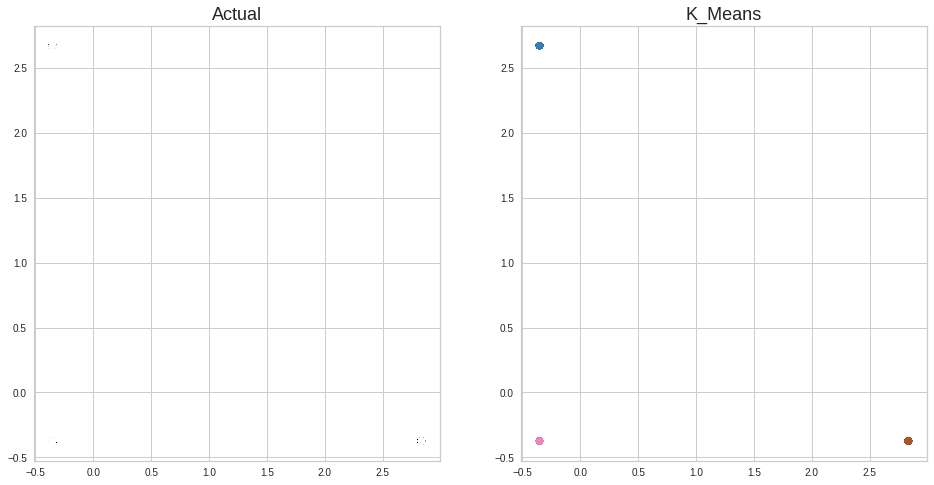

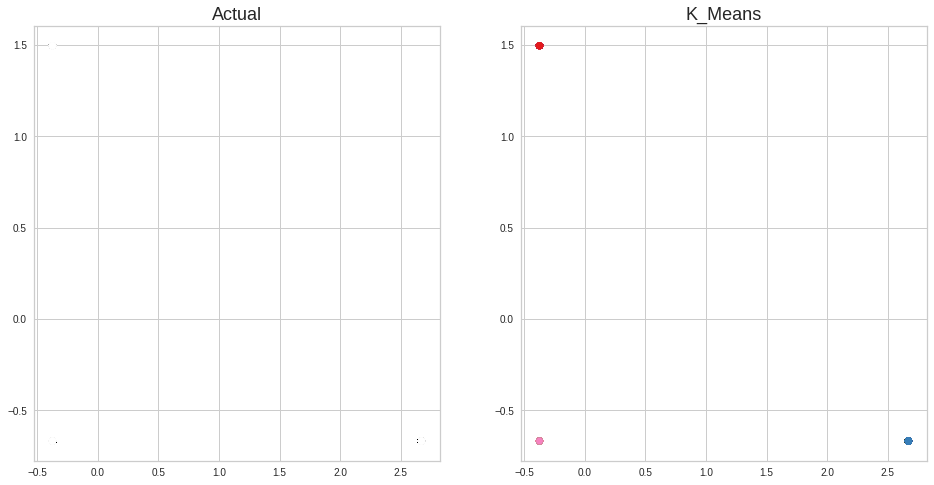

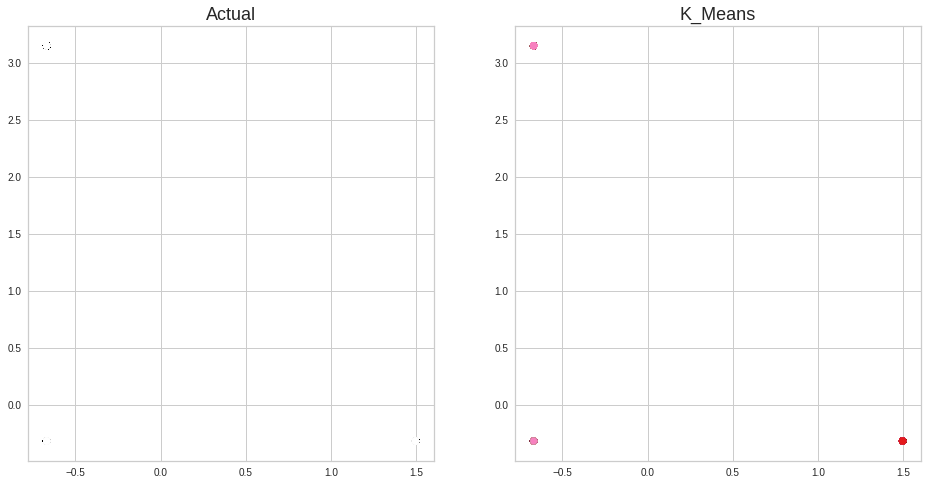

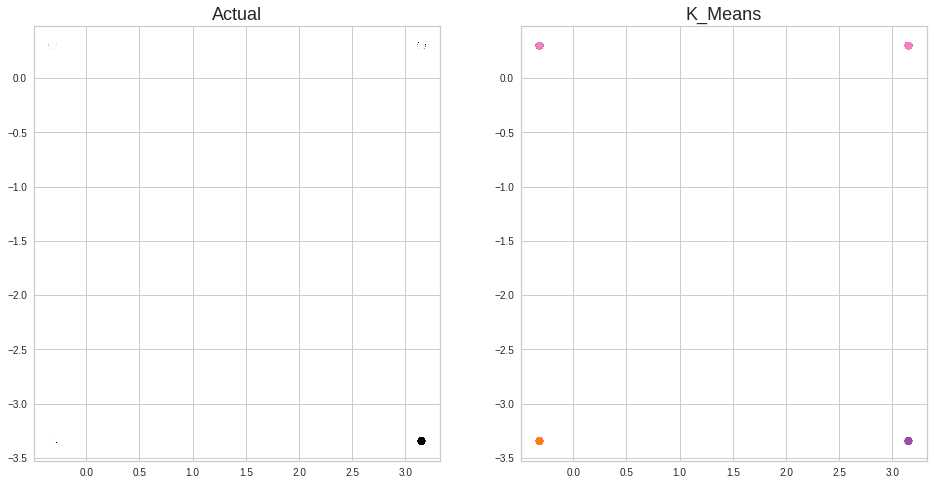

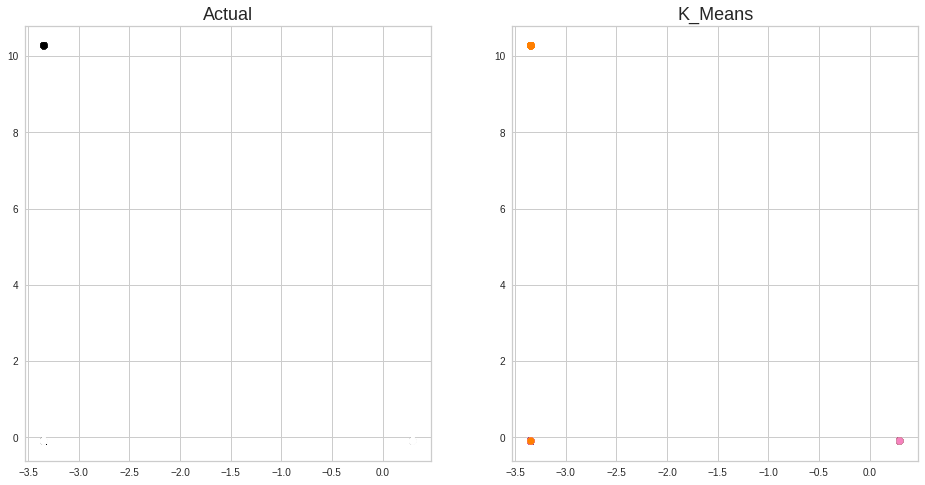

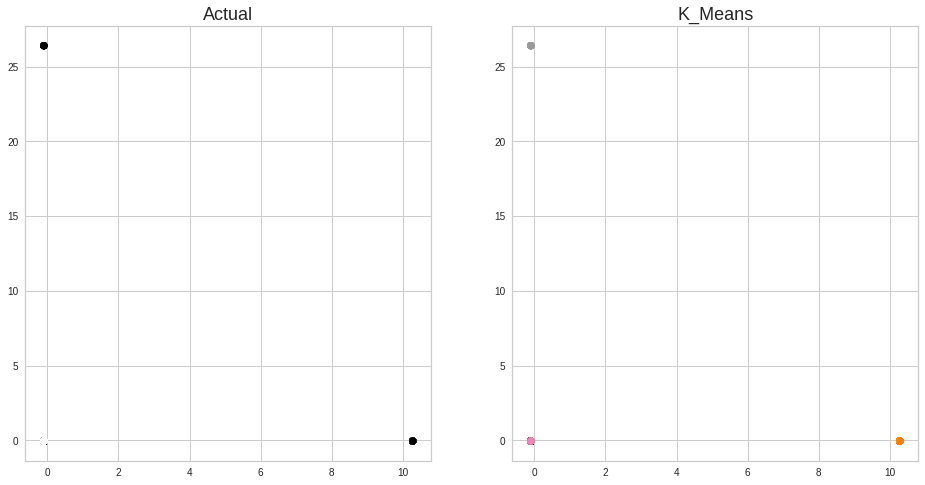

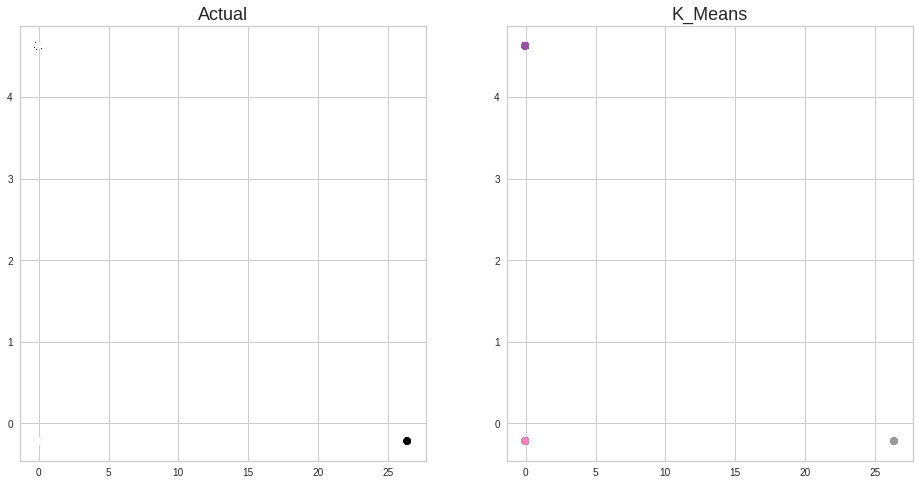

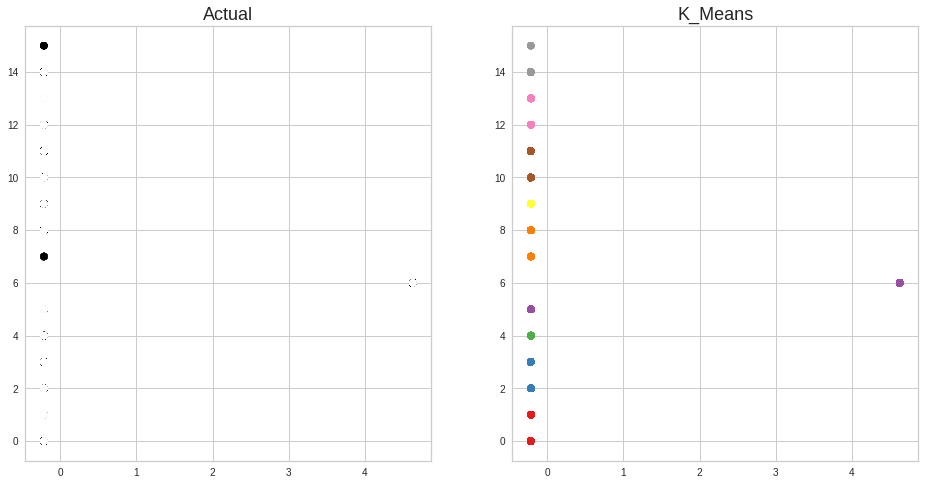

In [11]:
for i in range(1,32):
#     print(i)
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['target'])
    axes[1].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['k_means'], cmap=plt.cm.Set1)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)

/home/dheekshitha-vibha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


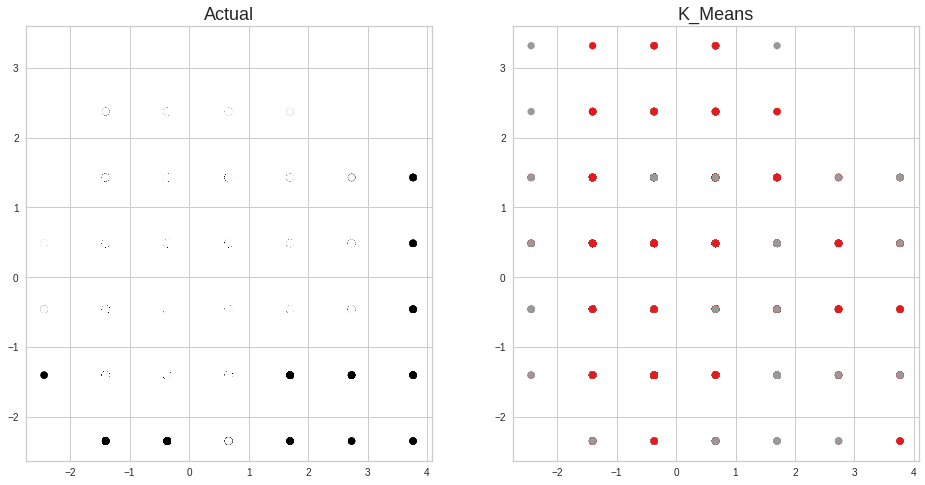

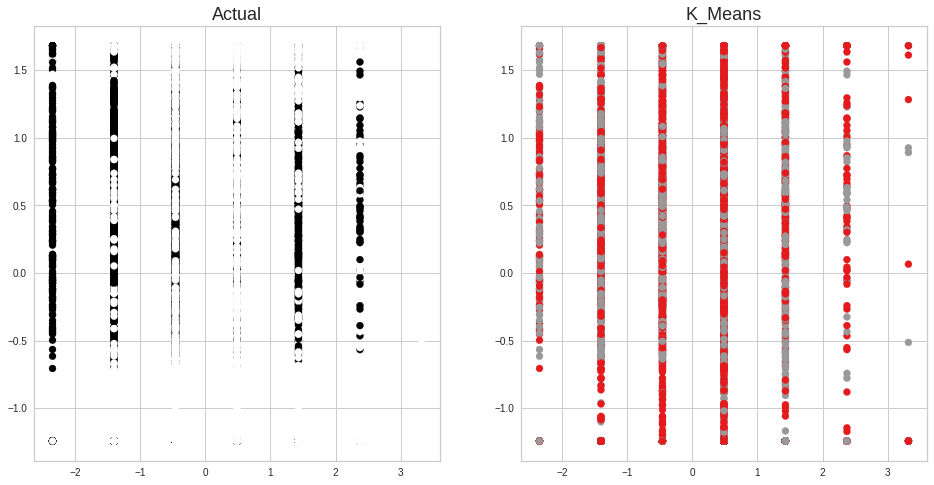

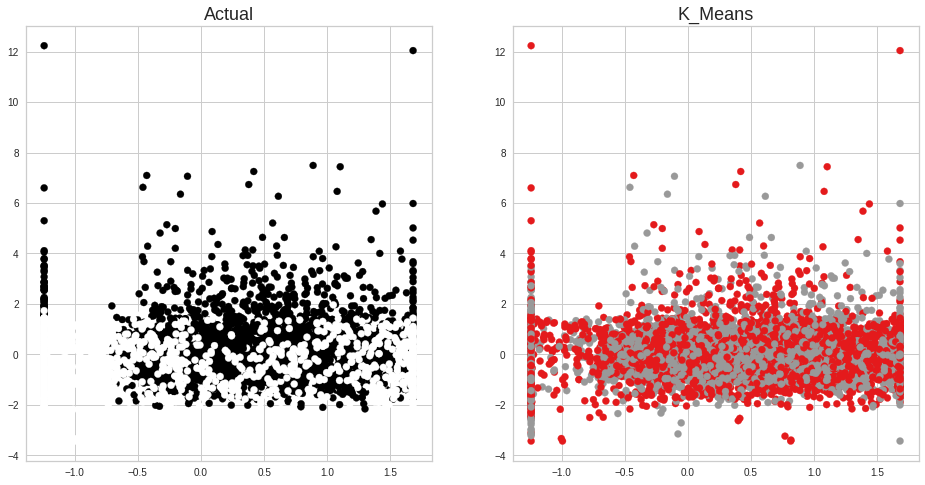

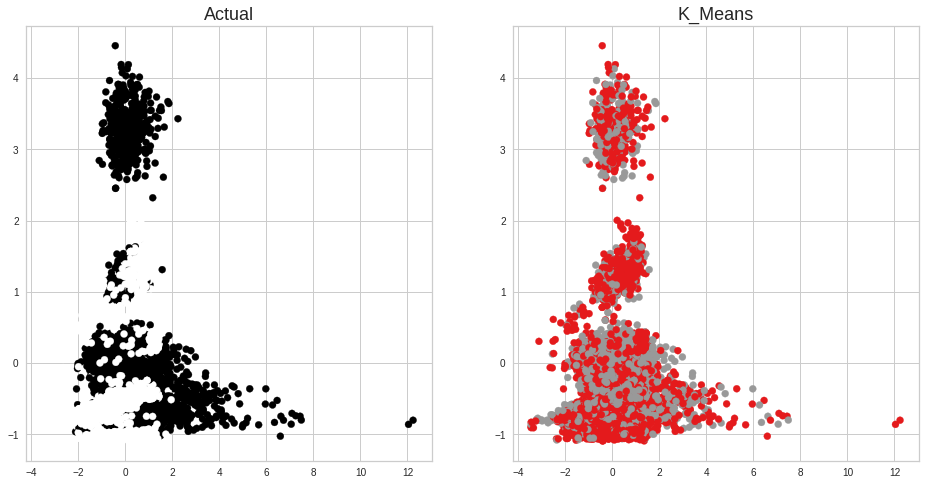

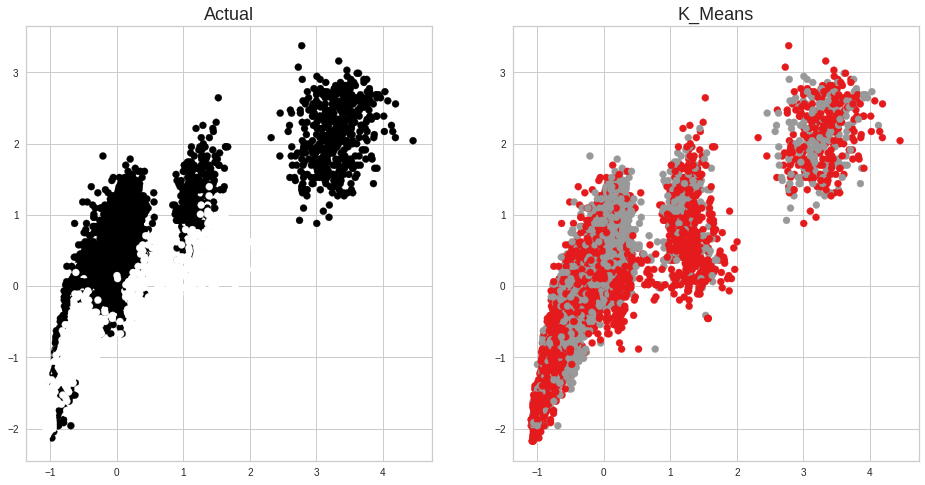

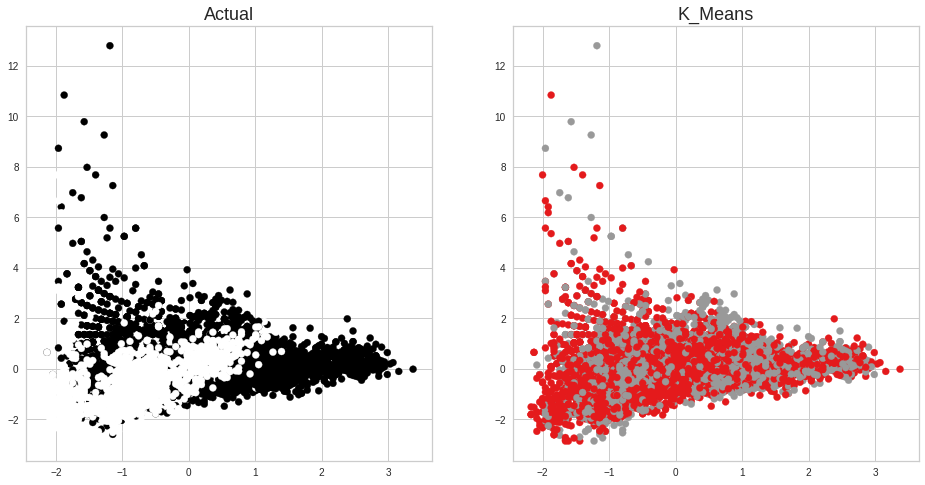

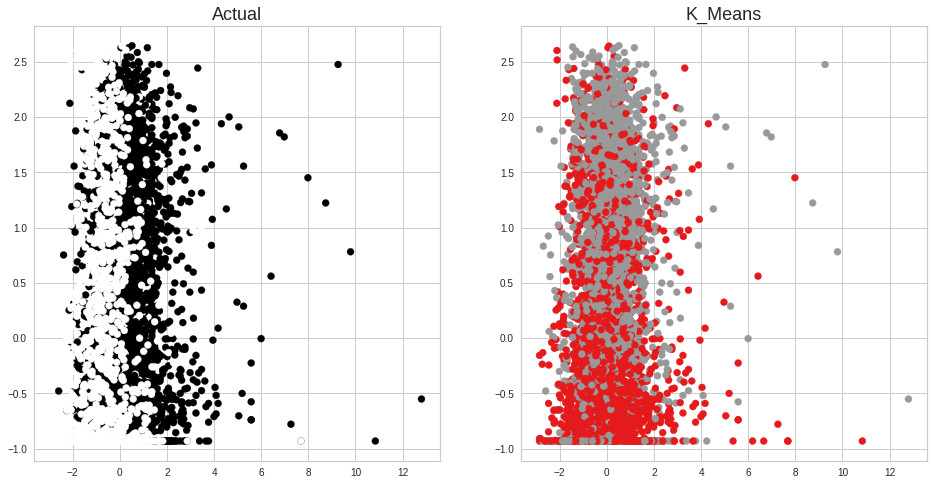

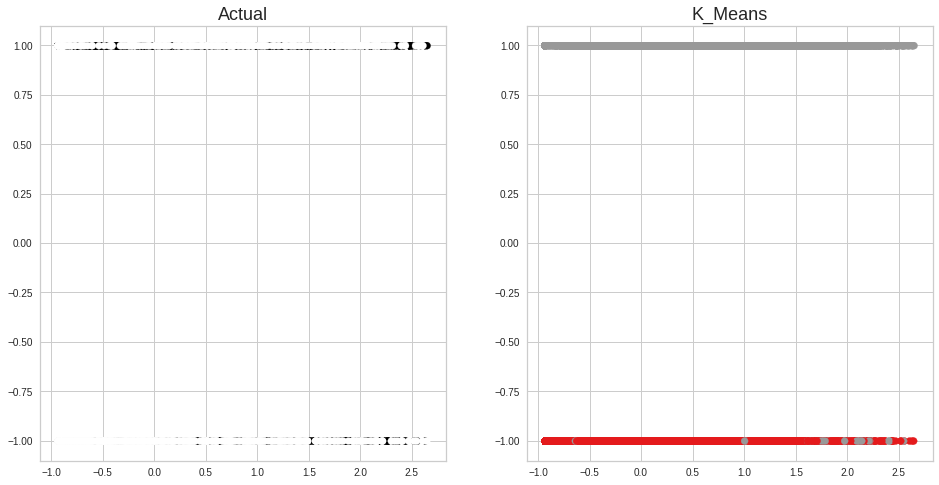

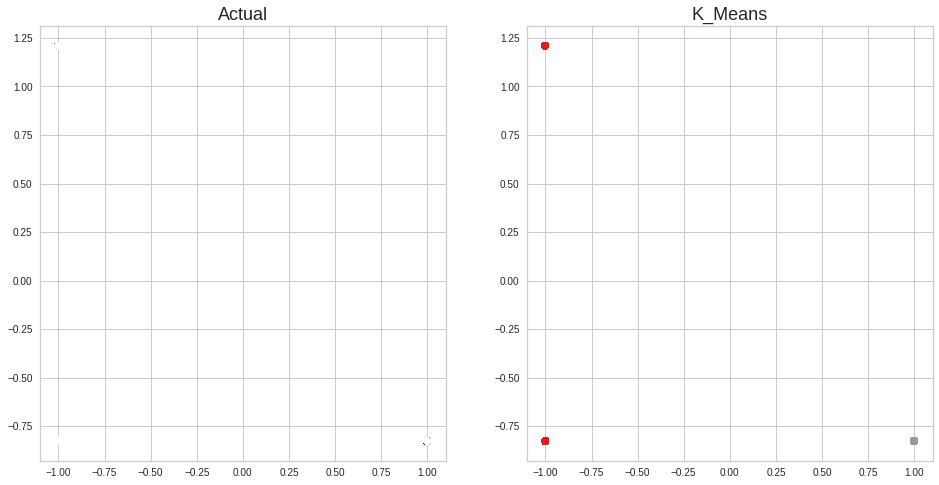

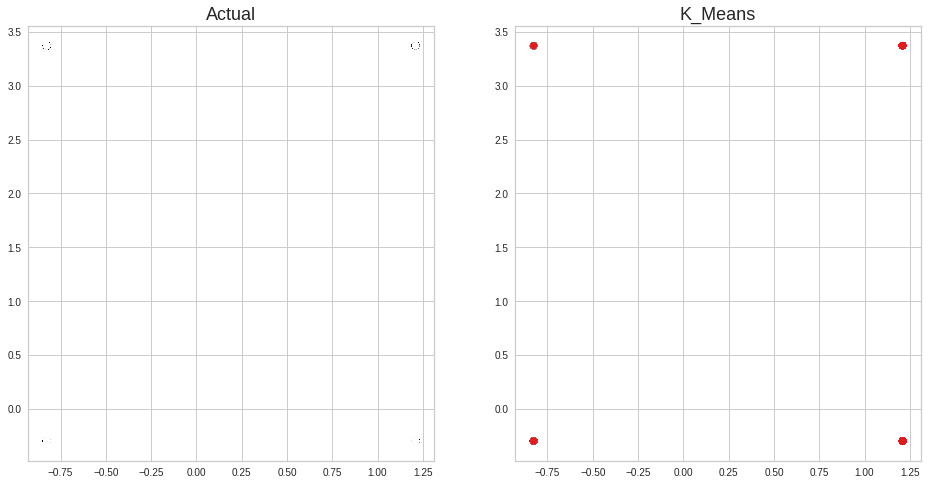

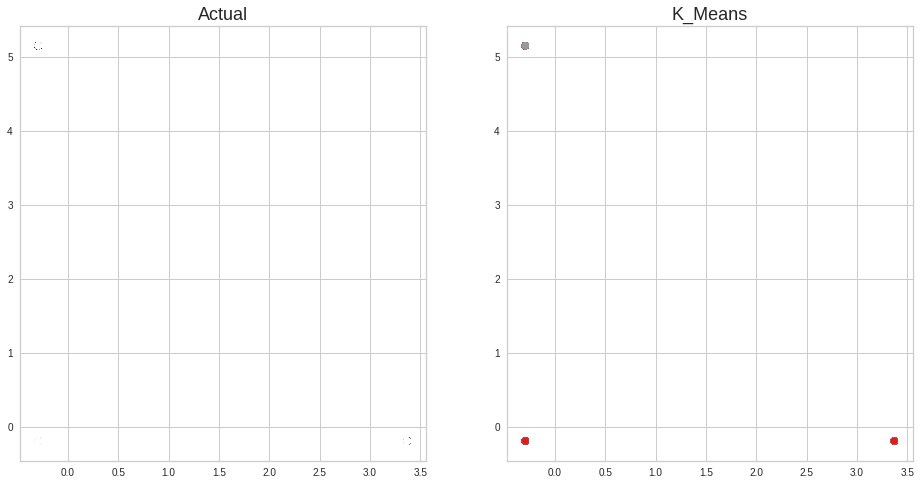

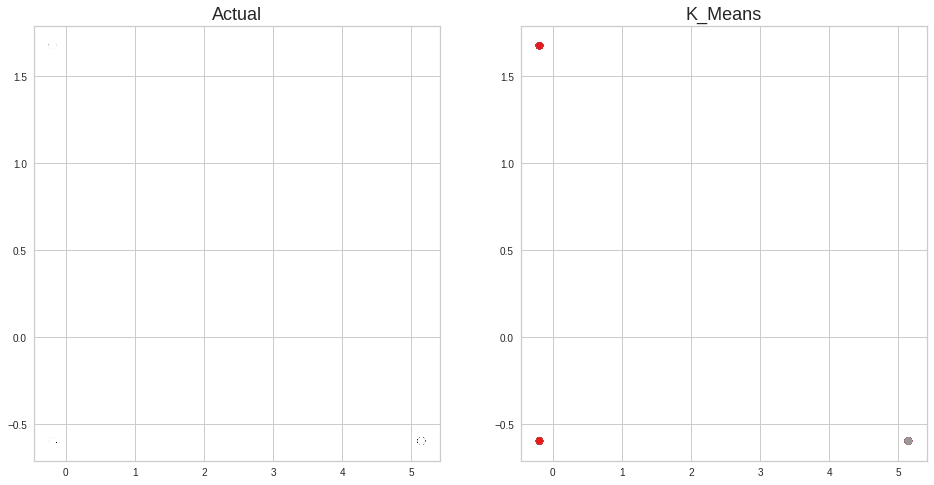

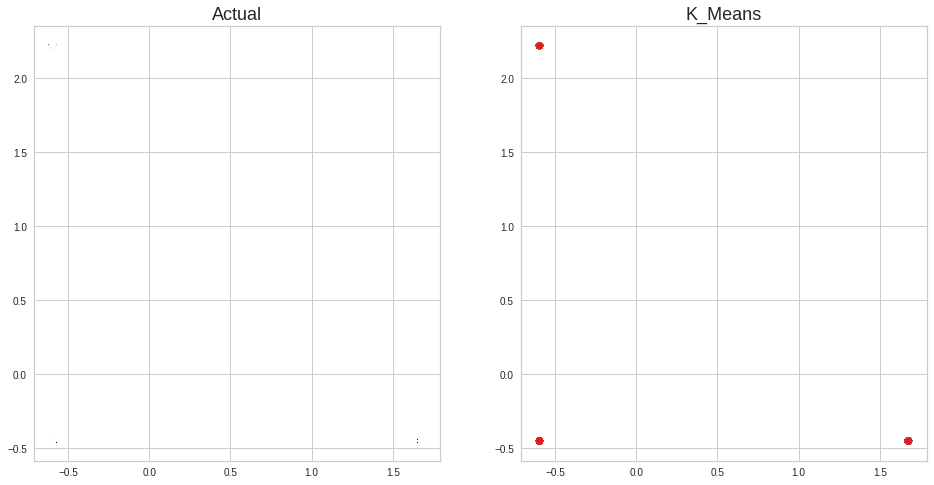

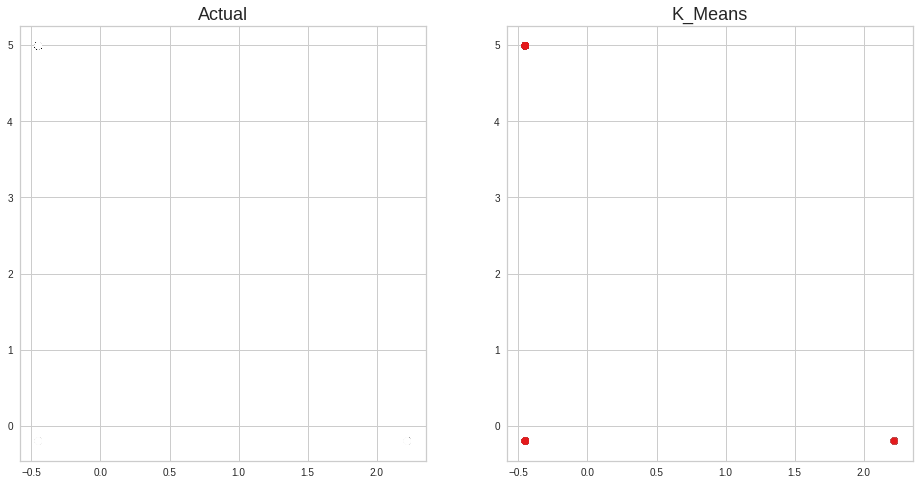

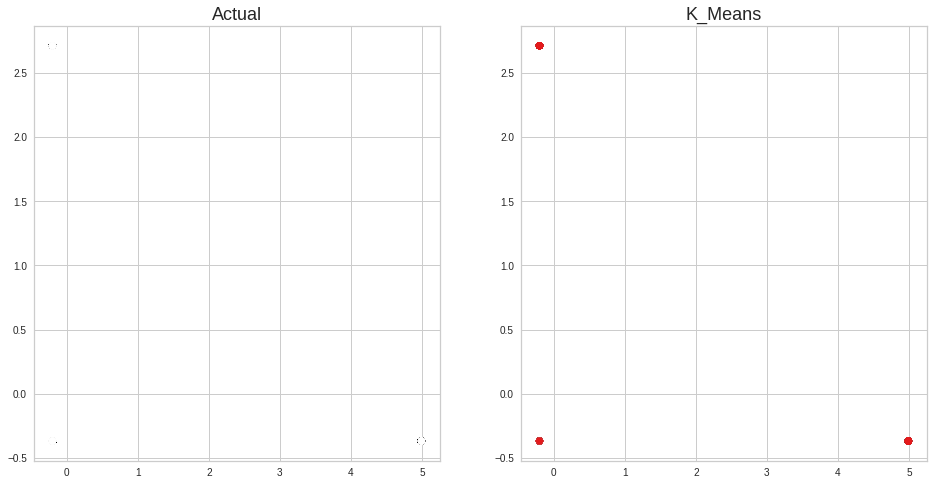

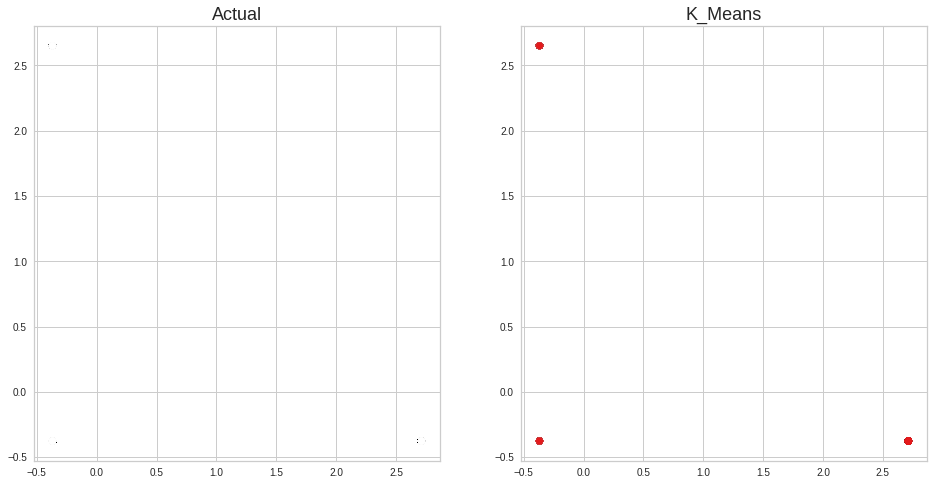

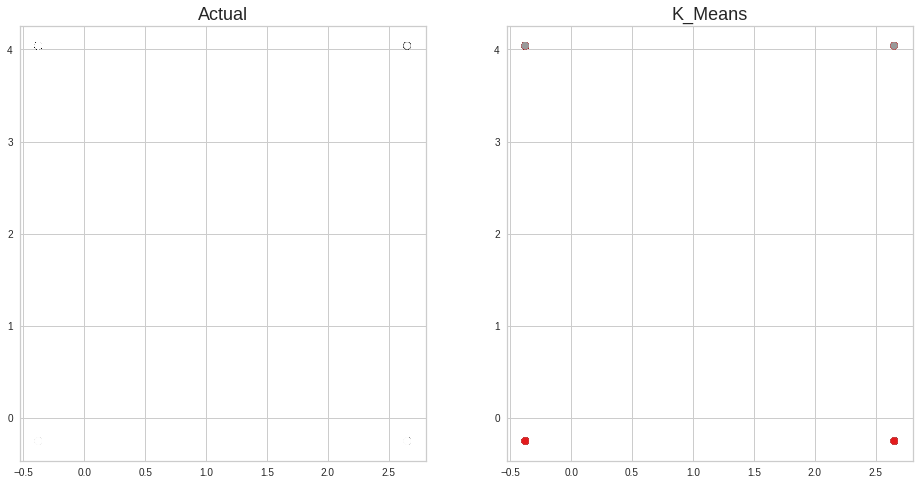

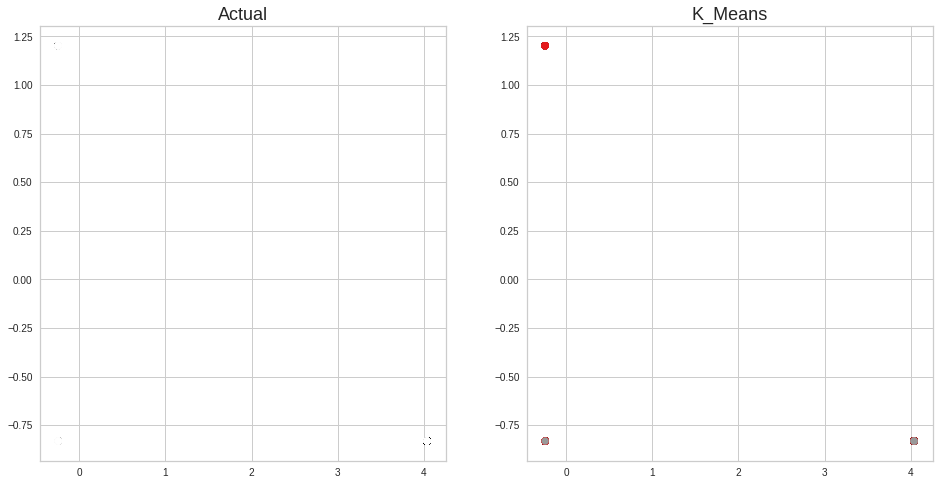

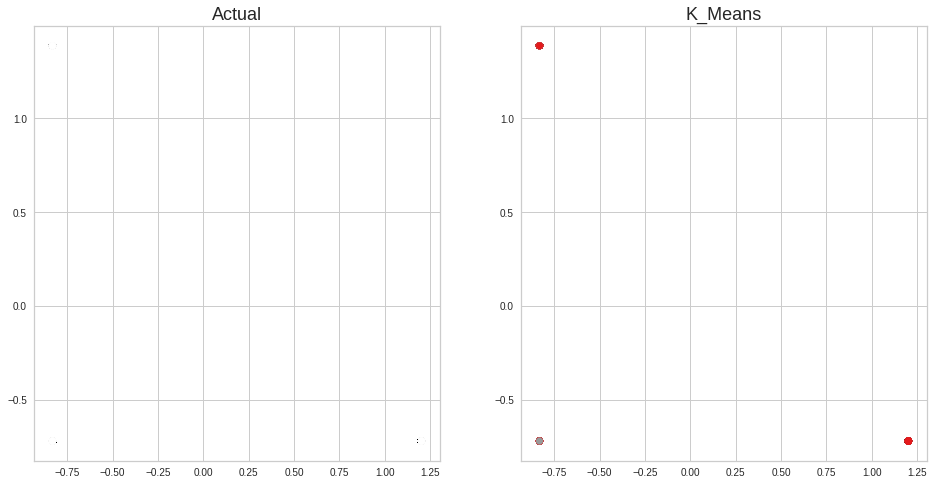

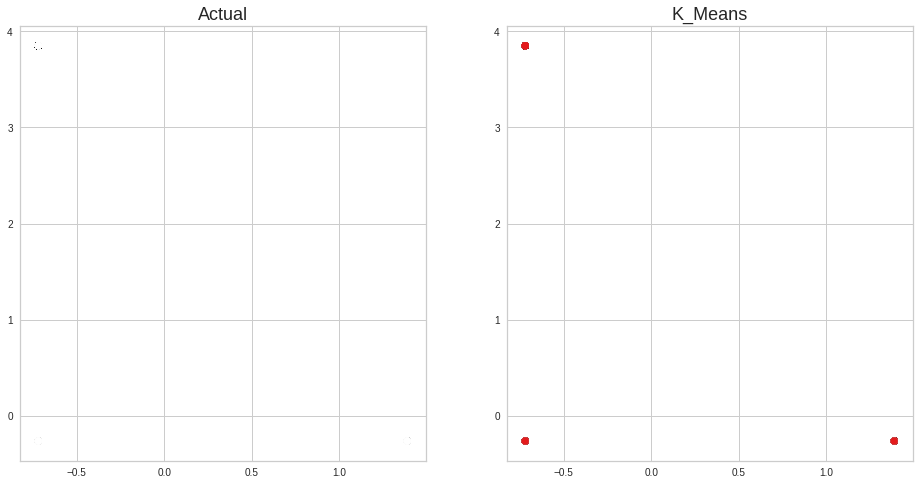

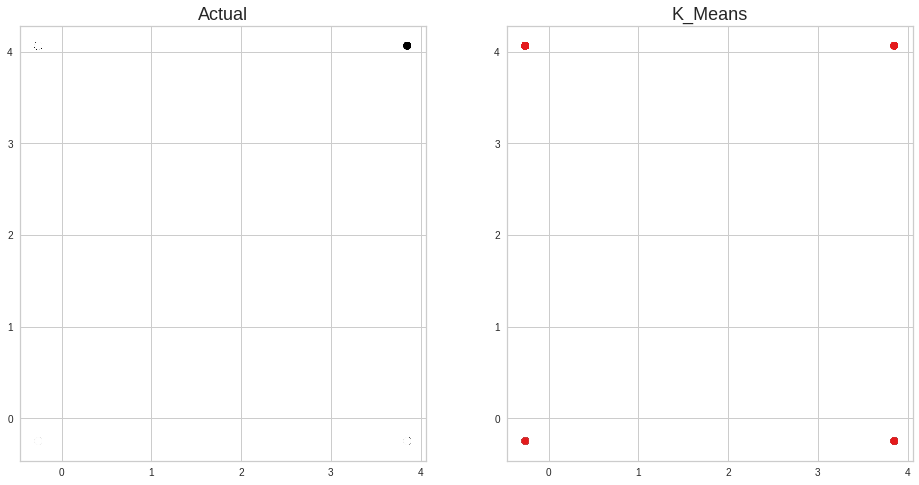

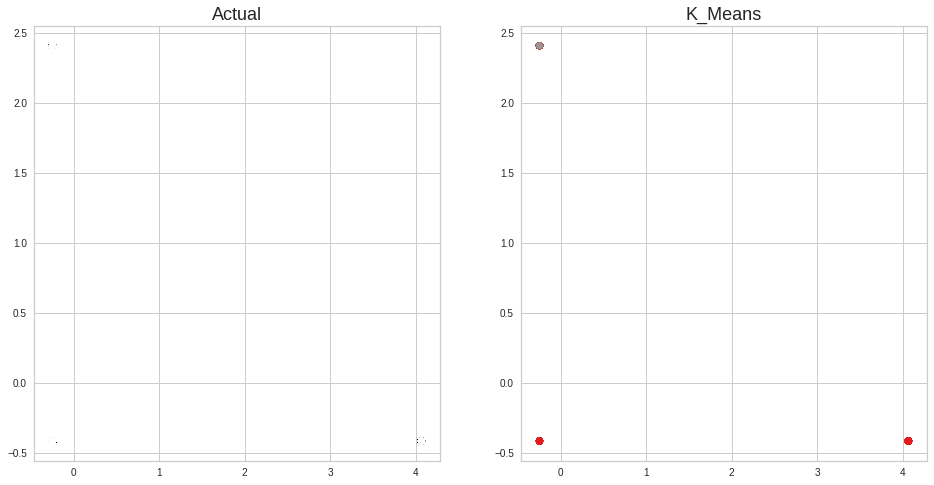

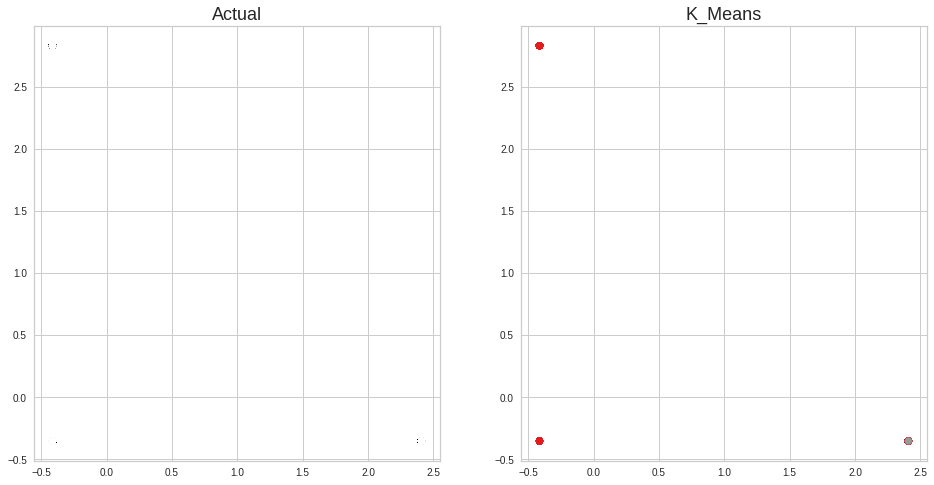

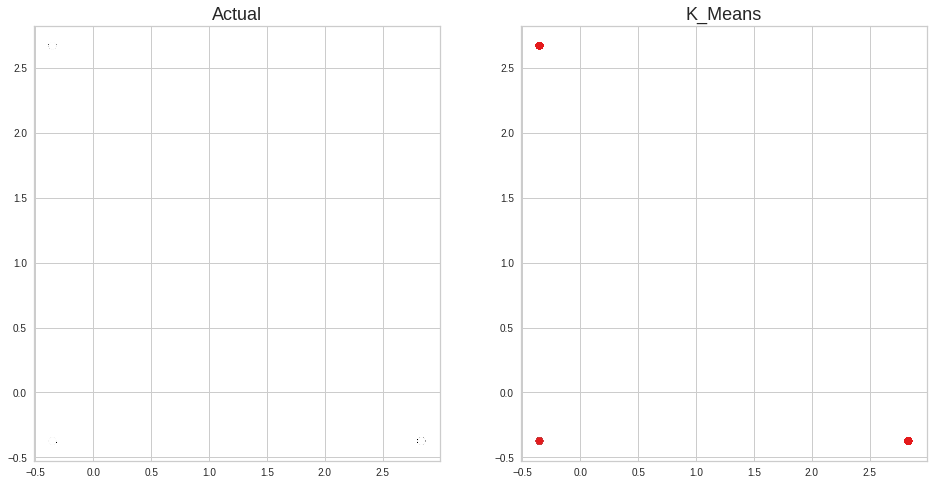

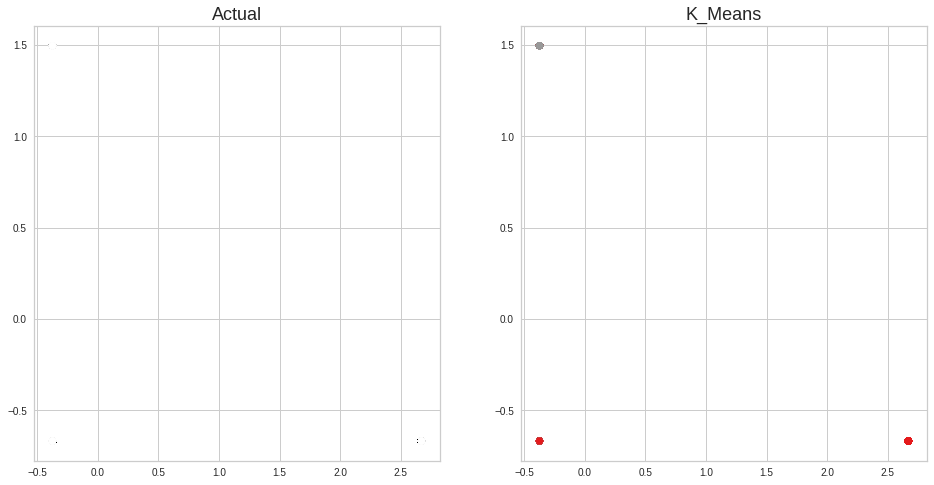

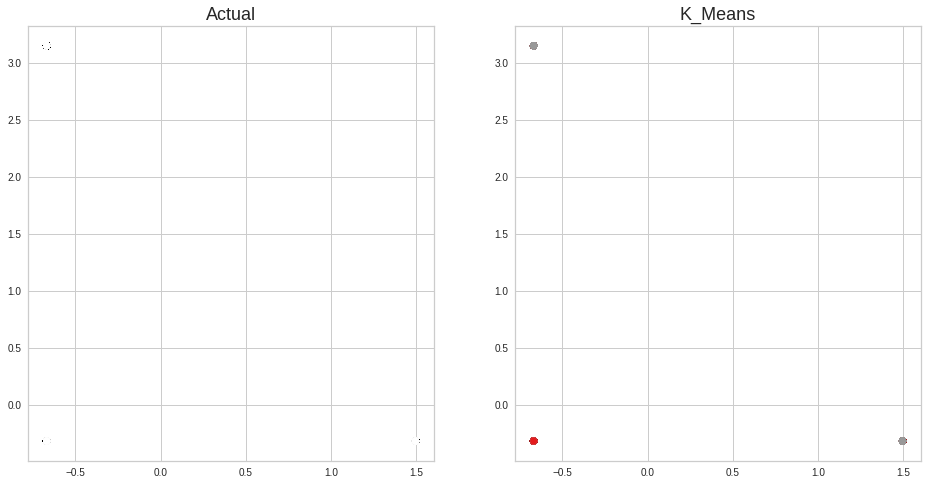

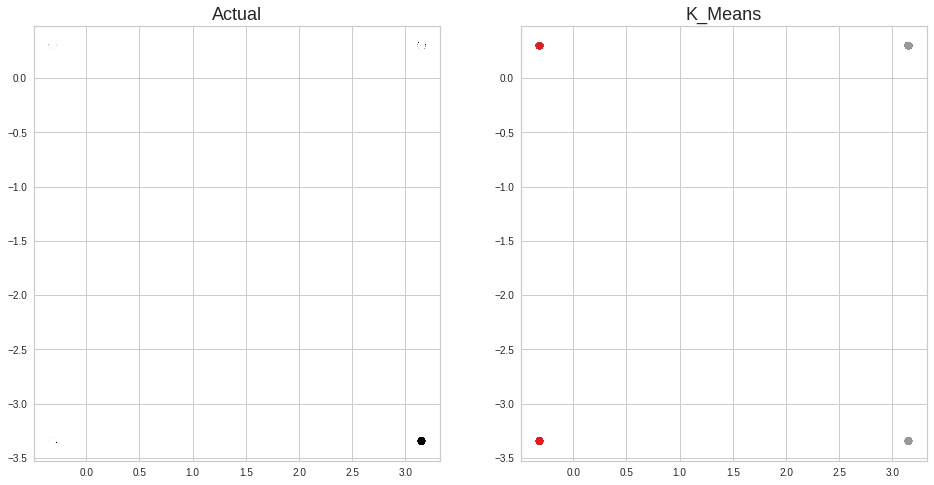

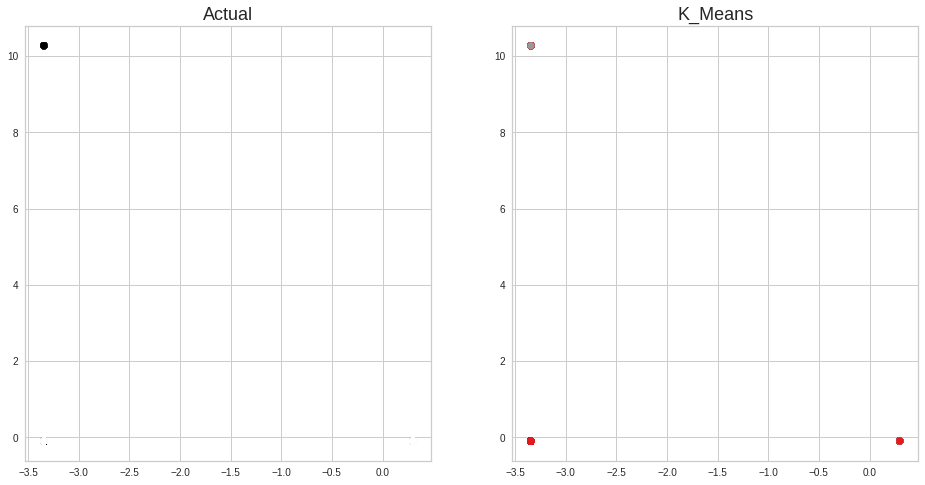

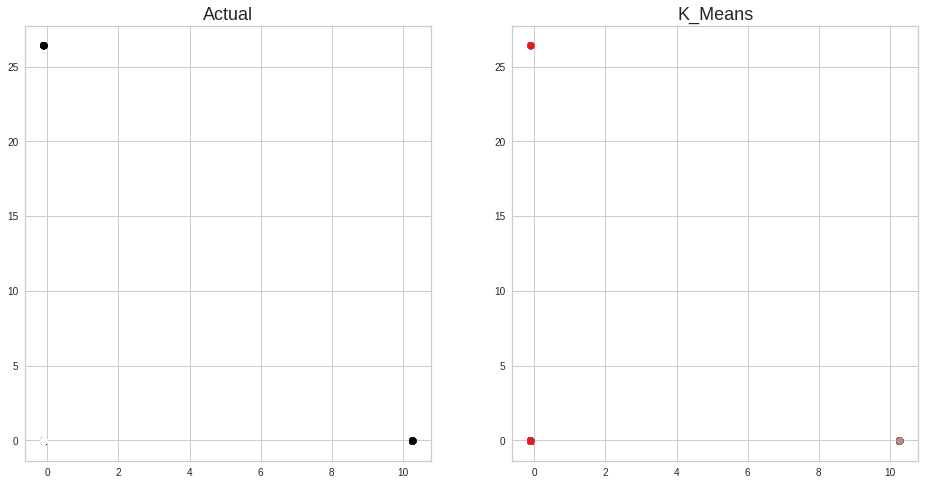

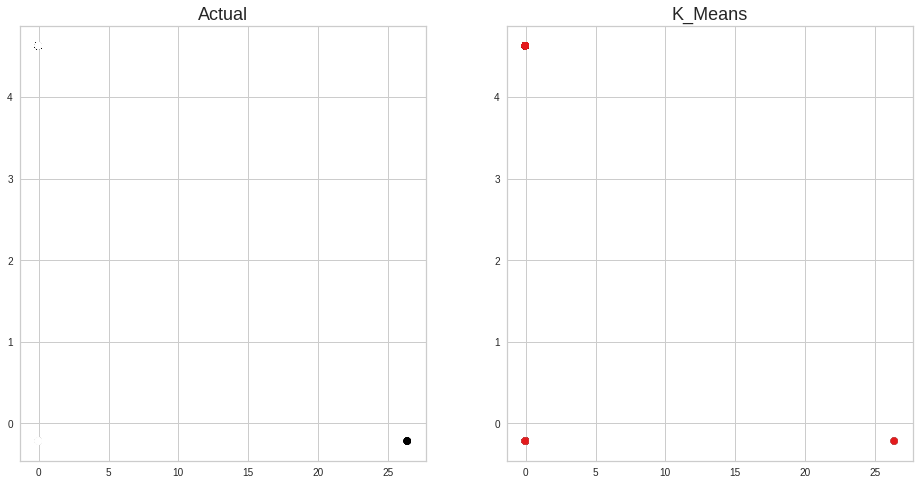

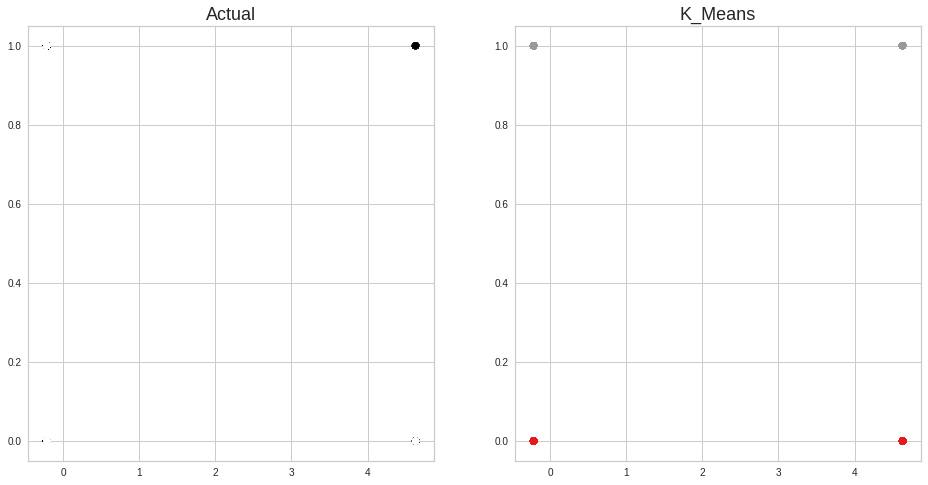

In [12]:
kmeanModel2= KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel2.fit(scaled_x_train)
df['k_means']=kmeanModel2.predict(scaled_x_train)
df['target']=y_train_res

for i in range(1,32):
#     print(i)
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['target'])
    axes[1].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['k_means'], cmap=plt.cm.Set1)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)

In [13]:
kmeanModel= KMeans(n_clusters=16, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel.fit(scaled_x_train)

# scaled_x_train[:,5].shape
kmeanModel.predict(scaled_x_train)
y_train_res.shape
df=pd.DataFrame(columns=X_train_res.columns)
df.shape

df=pd.DataFrame(scaled_x_train)
df.columns=X_train_res.columns


In [15]:
from sklearn.manifold import TSNE

(7675, 34)


NameError: name 'dftsne' is not defined

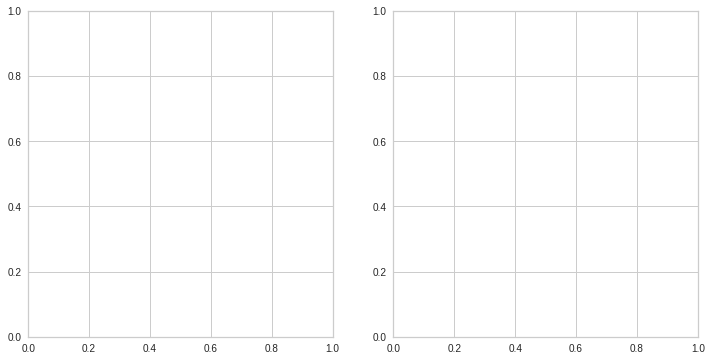

In [16]:


#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel.predict(scaled_x_train)
df['target']=y_train_res
print(df.shape)

Xtsne = TSNE(n_components=2).fit_transform(scaled_x_train)
dftsneFull = pd.DataFrame(Xtsne)

dftsneFull['cluster'] = df['k_means']
dftsneFull.columns = ['x1','x2','cluster']



In [17]:
Xtsne = TSNE(n_components=2).fit_transform(df)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = df['k_means']
dftsne.columns = ['x1','x2','cluster']

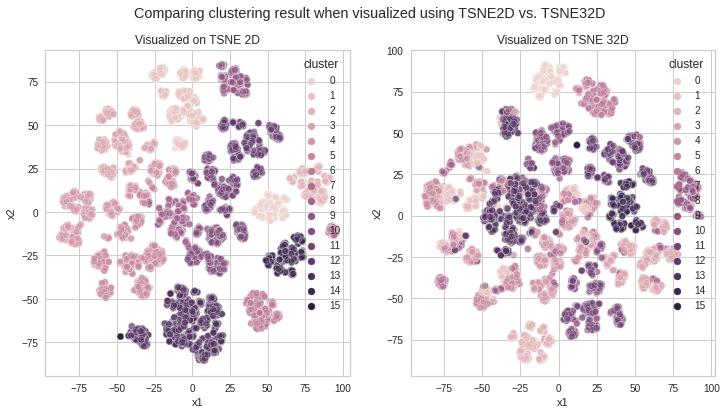

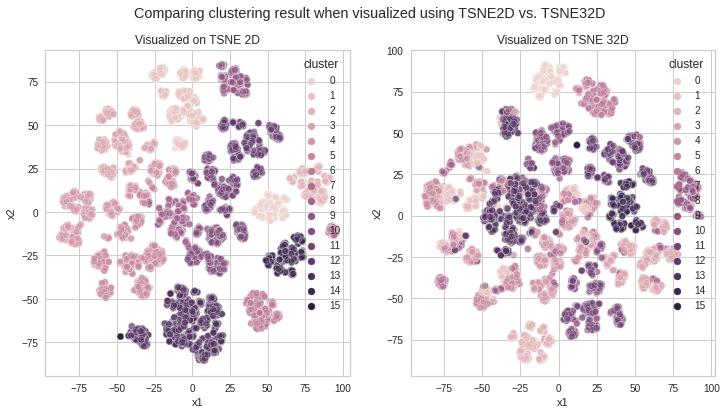

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dftsneFull,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on TSNE 32D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. TSNE32D')
display(fig)

# EXP MAX

In [ ]:
https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

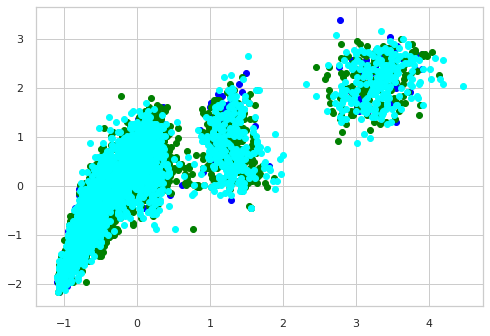

In [80]:

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(scaled_x_train)

#predictions from gmm
labels = gmm.predict(scaled_x_train)
frame = pd.DataFrame(scaled_x_train)
frame['cluster'] = labels
# frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data.iloc[:,5],data.iloc[:,6],c=color[k])
plt.show()

# PART2 & 3

## PCA

In [19]:
from sklearn.decomposition import PCA

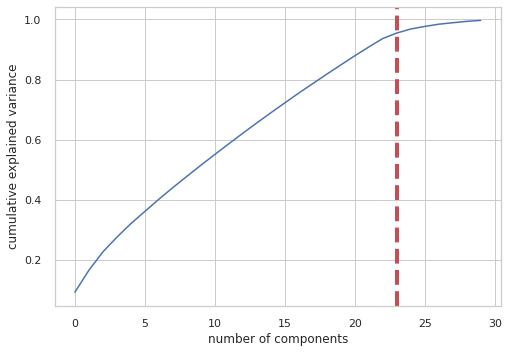

None

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=30)
pcaDF=pca_test.fit(scaled_x_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=23, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr


In [21]:
pca_final = PCA(n_components=23)
pca_finalDF=pca_final.fit_transform(scaled_x_train)



In [26]:
from sklearn.metrics import mean_squared_error

In [28]:
# # transformed_data = (...).fit_transform(X)
# inverse_data = np.linalg.pinv((rp).components_.T)
# reconstructed_data = transformed_data.dot(inverse_data)






recon = pca_final.inverse_transform(pca_final.fit_transform(scaled_x_train))
rmse = mean_squared_error(scaled_x_train, recon,squared=False)
print("RMSE: {} with {} components".format(rmse, 23))


RMSE: 0.22084447153045628 with 23 components


In [48]:
pca_test.explained_variance_ratio_

array([0.09325747, 0.07278877, 0.06104118, 0.04901842, 0.04507393,
       0.04061558, 0.04042882, 0.03872196, 0.03734211, 0.03683988,
       0.03595298, 0.03557881, 0.03499195, 0.03436042, 0.03350311,
       0.03299859, 0.03265997, 0.03151512, 0.03123278, 0.03078679,
       0.03035044, 0.02926423, 0.02819481, 0.01820439, 0.01346857,
       0.00854754, 0.00734177, 0.0049409 , 0.0045237 , 0.00320738])

In [56]:
pca_finalDF.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [69]:
y_train_res['Attrition_Flag']

0       1
1       1
2       1
3       1
4       1
       ..
7670    0
7671    0
7672    0
7673    0
7674    0
Name: Attrition_Flag, Length: 7675, dtype: int64

In [70]:
y=y_train_res['Attrition_Flag'].values.astype(np.int8)
target_names = np.unique(y)


In [71]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [72]:
i
pca_finalDF[y == i]

array([[ 2.01392418, -2.18114536,  0.85315491, ..., -0.39251397,
        -0.39776571, -1.86589204],
       [ 2.04661558, -0.92841671, -0.22996011, ...,  0.93431885,
         0.05243562,  0.65659532],
       [-1.5058408 , -0.99475339,  1.83058754, ..., -0.25787013,
        -0.75539713,  0.05346953],
       ...,
       [ 1.27130689, -3.00154282,  1.36538706, ..., -0.21332135,
         0.18984768,  1.11832095],
       [-1.70521326, -0.41737141, -1.32976958, ..., -0.00690347,
         0.57530145,  0.04888819],
       [ 0.32207239, -1.11033783, -0.04473005, ..., -0.132637  ,
         0.42386244,  0.0204636 ]])

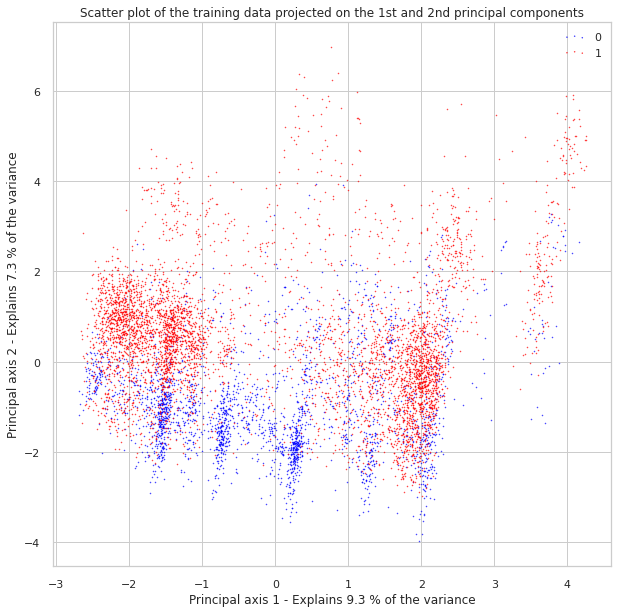

In [74]:
colors = ['blue', 'red']
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(pca_finalDF[y == i, 0], pca_finalDF[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca_test.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

In [49]:
# pca_df
import seaborn as sns
ax = sns.stripplot(

Cumulative Variance Ratio  Explained Variance Ratio
0                    0.093257                  0.093257
1                    0.166046                  0.072789
2                    0.227087                  0.061041
3                    0.276106                  0.049018
4                    0.321180                  0.045074
5                    0.361795                  0.040616
6                    0.402224                  0.040429
7                    0.440946                  0.038722
8                    0.478288                  0.037342
9                    0.515128                  0.036840
10                   0.551081                  0.035953
11                   0.586660                  0.035579
12                   0.621652                  0.034992
13                   0.656012                  0.034360
14                   0.689515                  0.033503
15                   0.722514                  0.032999
16                   0.755174                  0.032660
17                   0.786689                  0.031515
18                   0.817922                  0.031233
19                   0.848709                  0.030787
20                   0.879059                  0.030350
21                   0.908323                  0.029264
22                   0.936518                  0.028195
23                   0.954723                  0.018204
24                   0.968191                  0.013469
25                   0.976739                  0.008548
26                   0.984080                  0.007342
27                   0.989021                  0.004941
28                   0.993545                  0.004524
29                   0.996752                  0.003207

In [53]:
# 0.936518+0.028195
# 0.029264+0.879059 	

0.908323

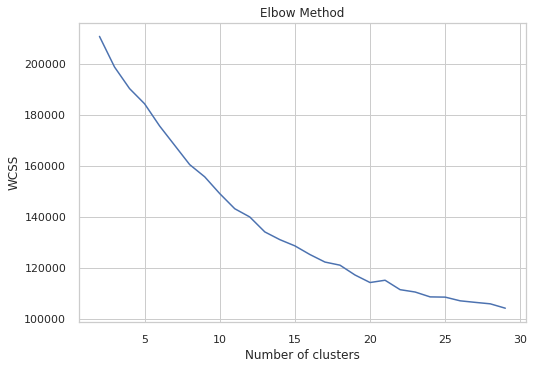

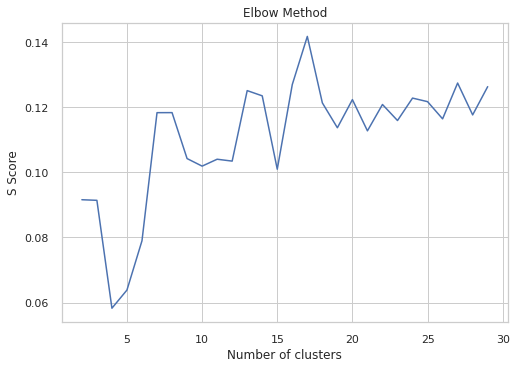

In [22]:
from sklearn.cluster import KMeans
wcss = []
sscore=[]
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_finalDF)
    wcss.append(kmeans.inertia_)
    sscore.append(silhouette_score(pca_finalDF, kmeans.labels_, metric='euclidean'))
#
# Print the score
#
# print('Silhouetter Score: %.3f' % score)


plt.plot(range(2, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 30), sscore)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('S Score')
plt.show()

In [23]:
kmeanModel= KMeans(n_clusters=16, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel.fit(pca_finalDF)

# scaled_x_train[:,5].shape
kmeanModel.predict(pca_finalDF)
y_train_res.shape

# df=pd.DataFrame(columns=X_train_res.columns)
# df.shape

df=pd.DataFrame(pca_finalDF)
# df.columns=



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel.predict(pca_finalDF)
df['target']=y_train_res
print(df.shape)

(7675, 25)


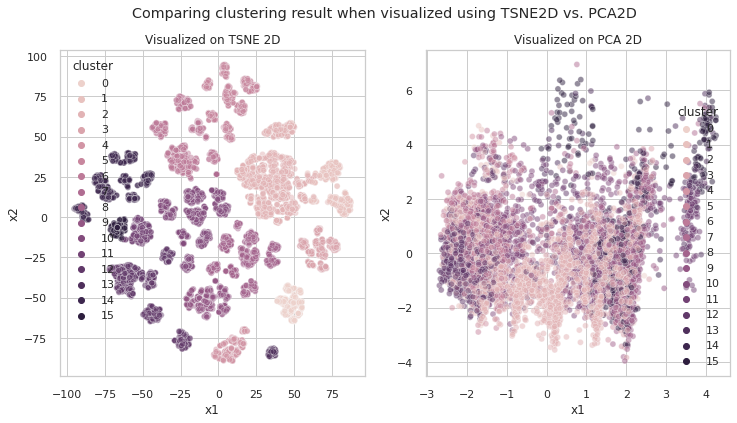

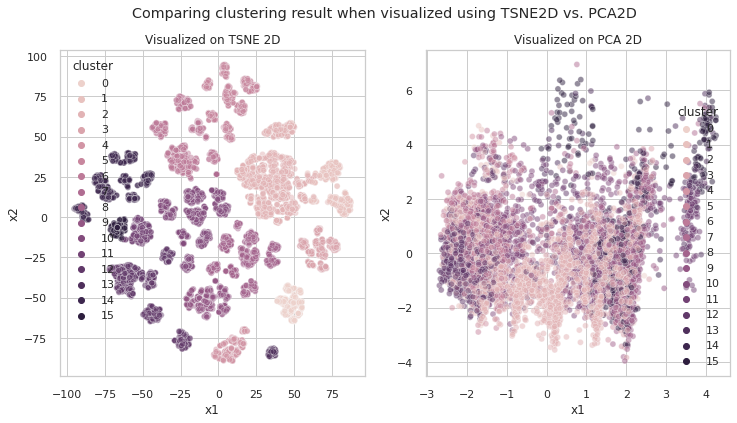

In [24]:


# X = pca_finalDF.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(df)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = df['k_means']
dftsne.columns = ['x1','x2','cluster']

pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(scaled_x_train)
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = df['k_means']
dfskillsPCA2.columns = ['x1','x2','cluster']

fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [30]:
# Creating ICA object
from sklearn.decomposition import FastICA

meanKurt=[]

# tmp = pd.DataFrame(tmp)
for j in range(2,30):
    ICA = FastICA(n_components=j)
    IndependentComponentValues=ICA.fit_transform(scaled_x_train)

    #Creating the dataframe
#     print('####### Final Independent Components ######')
    ReducedData=pd.DataFrame(data=IndependentComponentValues)
    #                          , columns=['IC1','IC2'])
#     print(ReducedData.head(10))

    tmp= ReducedData.kurt(axis=0)
    x=tmp.abs().mean()
    meanKurt.append(x)

####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Components ######
####### Final Independent Compon

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


####### Final Independent Components ######
####### Final Independent Components ######


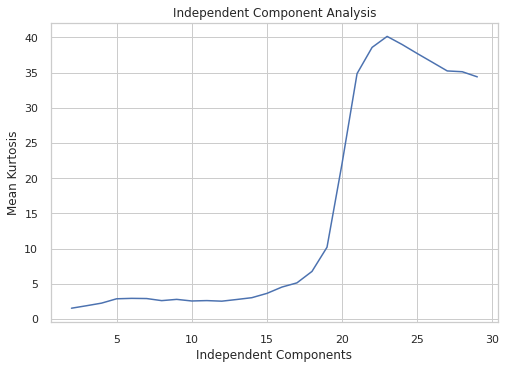

In [32]:
plt.plot(range(2, 30), meanKurt)
plt.title('Independent Component Analysis')
plt.xlabel('Independent Components')
plt.ylabel('Mean Kurtosis')
plt.show()

# plt.plot(range(2, 30), sscore)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('S Score')
# plt.show()

In [39]:
ICAFinal = FastICA(n_components=23)
IndependentComponentValues=ICAFinal.fit_transform(scaled_x_train)

In [40]:
ReducedData=pd.DataFrame(data=IndependentComponentValues)

tmp= ReducedData.kurt(axis=0)
x=tmp.abs().mean()
x

40.17714122959292

(7675, 25)


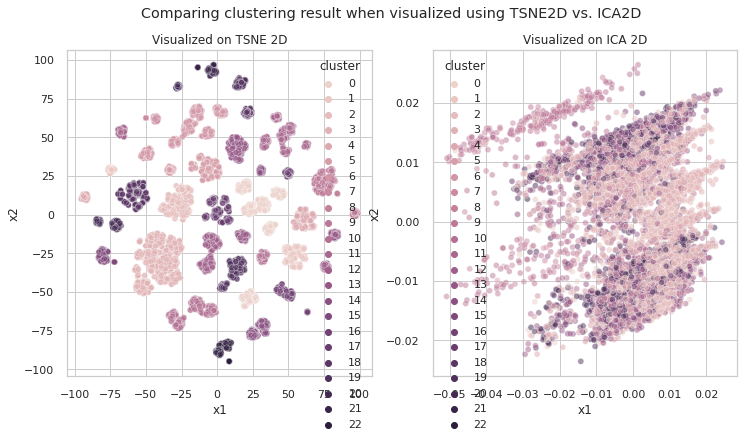

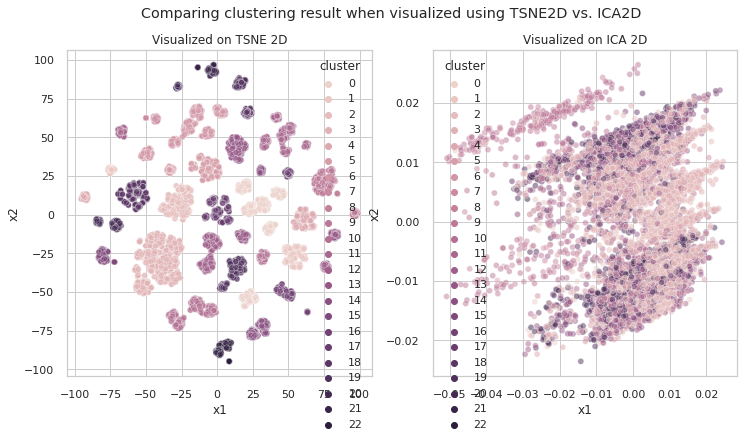

In [44]:
kmeanModel23= KMeans(n_clusters=23, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel23.fit(IndependentComponentValues)

# scaled_x_train[:,5].shape
kmeanModel23.predict(IndependentComponentValues)
y_train_res.shape

# df=pd.DataFrame(columns=X_train_res.columns)
# df.shape

df=pd.DataFrame(IndependentComponentValues)
# df.columns=



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel23.predict(IndependentComponentValues)
df['target']=y_train_res
print(df.shape)

# X = pca_finalDF.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(df)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = df['k_means']
dftsne.columns = ['x1','x2','cluster']

ICAFinal = FastICA(n_components=2)
IndependentComponentValues2=ICAFinal.fit_transform(scaled_x_train)
dfskillsICA2 = pd.DataFrame(IndependentComponentValues2)
dfskillsICA2['cluster'] = df['k_means']
dfskillsICA2.columns = ['x1','x2','cluster']



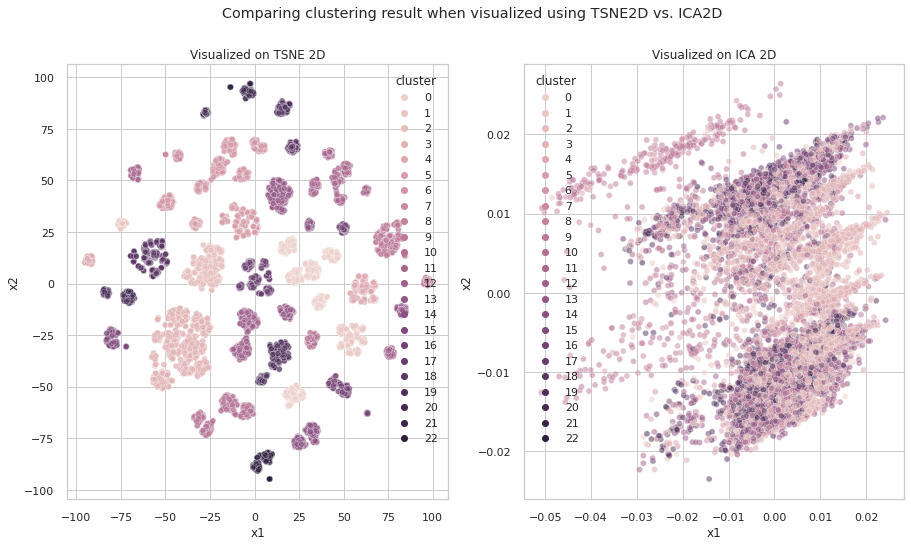

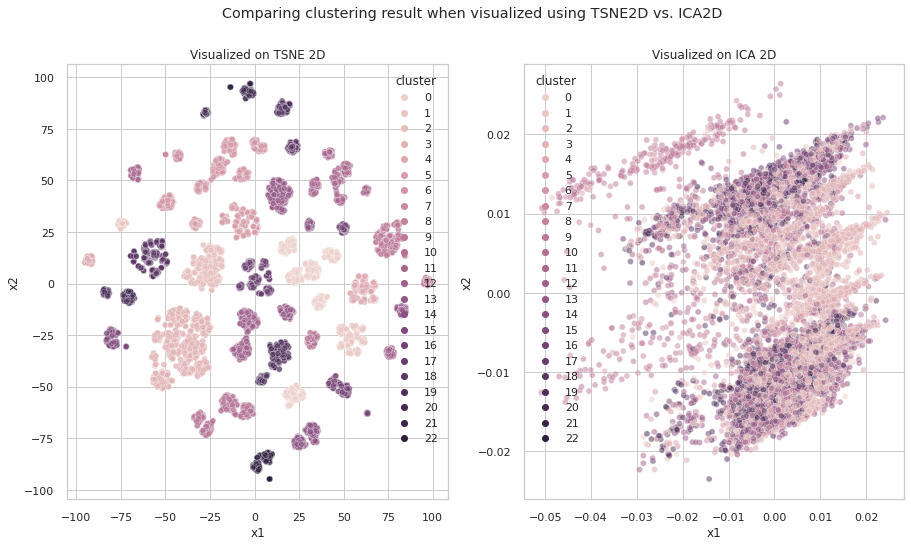

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsICA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on ICA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. ICA2D')
display(fig)

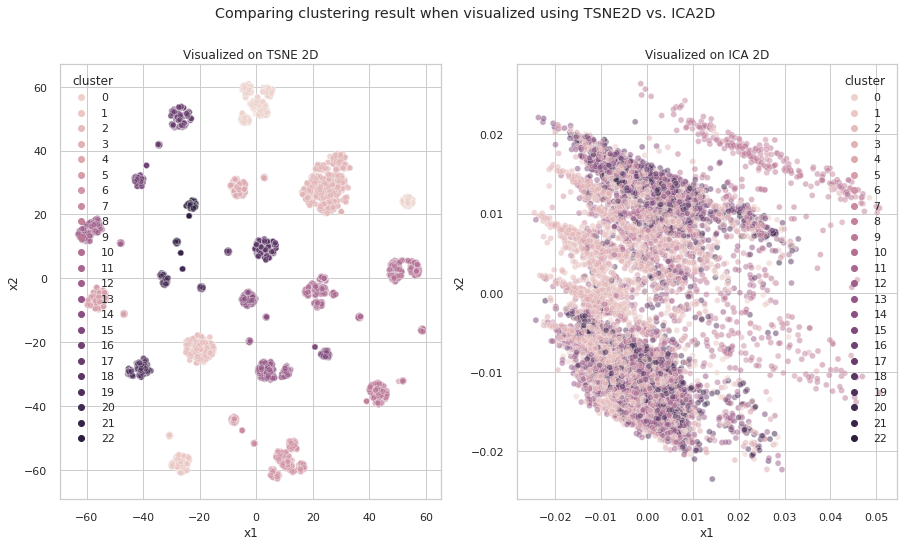

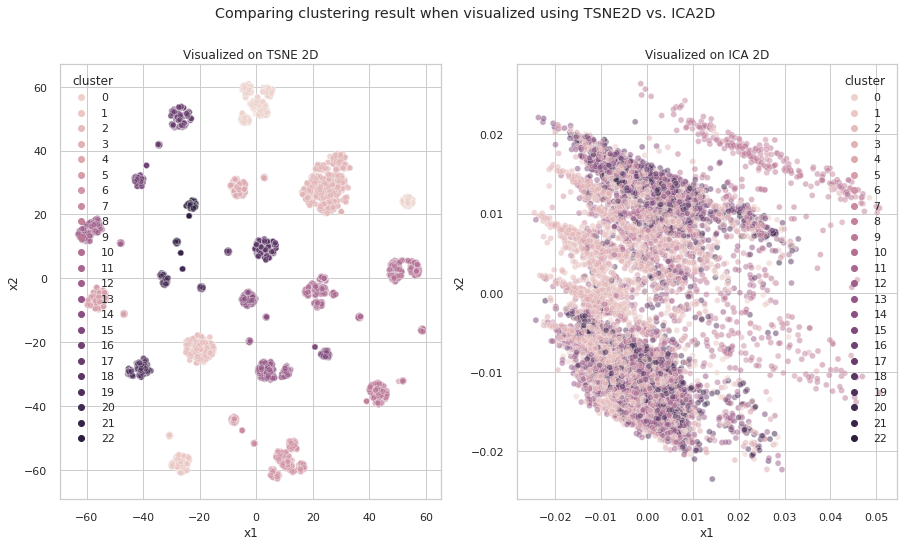

In [46]:
Xtsne = TSNE(n_components=2,perplexity=100).fit_transform(df)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = df['k_means']
dftsne.columns = ['x1','x2','cluster']

ICAFinal = FastICA(n_components=2)
IndependentComponentValues2=ICAFinal.fit_transform(scaled_x_train)
dfskillsICA2 = pd.DataFrame(IndependentComponentValues2)
dfskillsICA2['cluster'] = df['k_means']
dfskillsICA2.columns = ['x1','x2','cluster']

fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsICA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on ICA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. ICA2D')
display(fig)